# <u> Case Numbers Can be Misleading to Determine Lockdown Measures </u>

## <u> Preparation: </u> Imports, Loading Data, Creating Directories

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
# supress annoying warnings for plotting
warnings.filterwarnings('ignore')

In [4]:
# load data [30Mb!]
full_data = pd.read_csv('owid-covid-data.csv')
# docu at: https://github.com/owid/covid-19-data/tree/master/public/data
# 100k rows, 60 cols

# convert date variable to pd.Timestamp object
full_data.date = pd.to_datetime(full_data.date)

In [5]:
# set plotting params
font = {'size'   : 18}
plt.rc('font', **font)

In [6]:
# create directories
!mkdir fig4paper/icu_occupancy
!mkdir fig4paper/icu_admissions

mkdir: fig4paper/icu_occupancy: File exists
mkdir: fig4paper/icu_admissions: File exists


### Variables in the Data Set

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106559 entries, 0 to 106558
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               106559 non-null  object        
 1   continent                              101611 non-null  object        
 2   location                               106559 non-null  object        
 3   date                                   106559 non-null  datetime64[ns]
 4   total_cases                            102212 non-null  float64       
 5   new_cases                              102209 non-null  float64       
 6   new_cases_smoothed                     101199 non-null  float64       
 7   total_deaths                           91863 non-null   float64       
 8   new_deaths                             92018 non-null   float64       
 9   new_deaths_smoothed                    101199 no

In [7]:
# Extract Relevant Columns and Group By Country
cases_icu_grouped = full_data[['location',  'date', 'new_cases_smoothed_per_million', 'positive_rate',
                               'weekly_icu_admissions_per_million', 'icu_patients_per_million']].groupby('location')

## Group ICU and Case Data by Country

In [8]:
# Get names of locations/ countries for which ICU data is available
icu_admissions_countries = []
icu_countries = []

for location, group in cases_icu_grouped:
    if not group['weekly_icu_admissions_per_million'].isnull().values.all():
        icu_admissions_countries.append(location)
    if not group['icu_patients_per_million'].isnull().values.all():
        icu_countries.append(location)
        
print('Weekly ICU-Admissions available for: \n', icu_admissions_countries, '\n')
print('ICU-Patients (on a given day) available for: \n', icu_countries)

Weekly ICU-Admissions available for: 
 ['Cyprus', 'Czechia', 'Estonia', 'France', 'Greece', 'Ireland', 'Israel', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Slovenia', 'Spain', 'Sweden'] 

ICU-Patients (on a given day) available for: 
 ['Algeria', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Romania', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom', 'United States']


## Plot ICU and Case Statistics along Time

### ICU Admissions

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


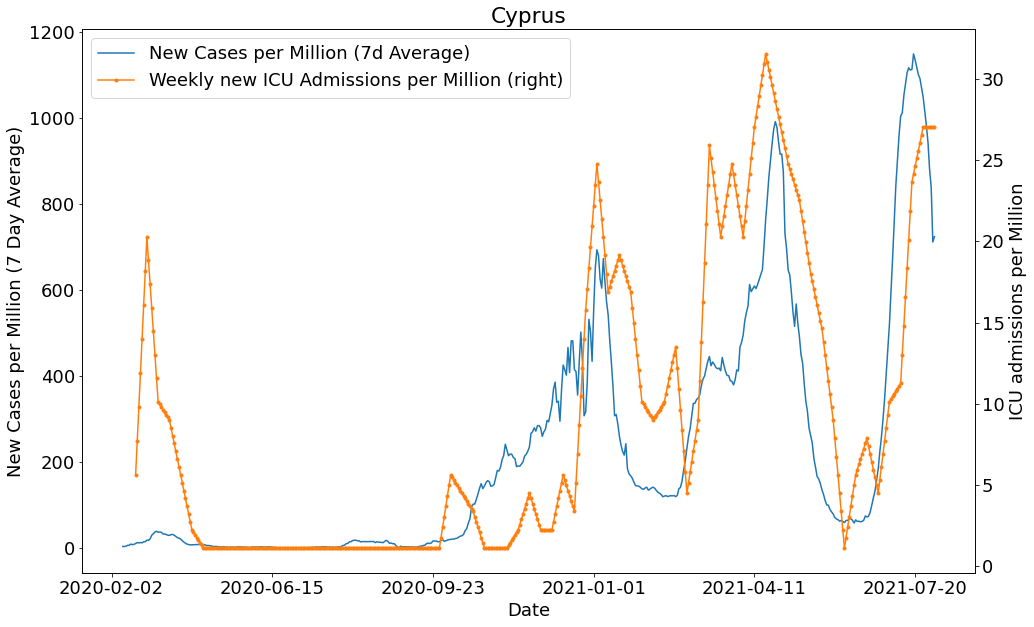

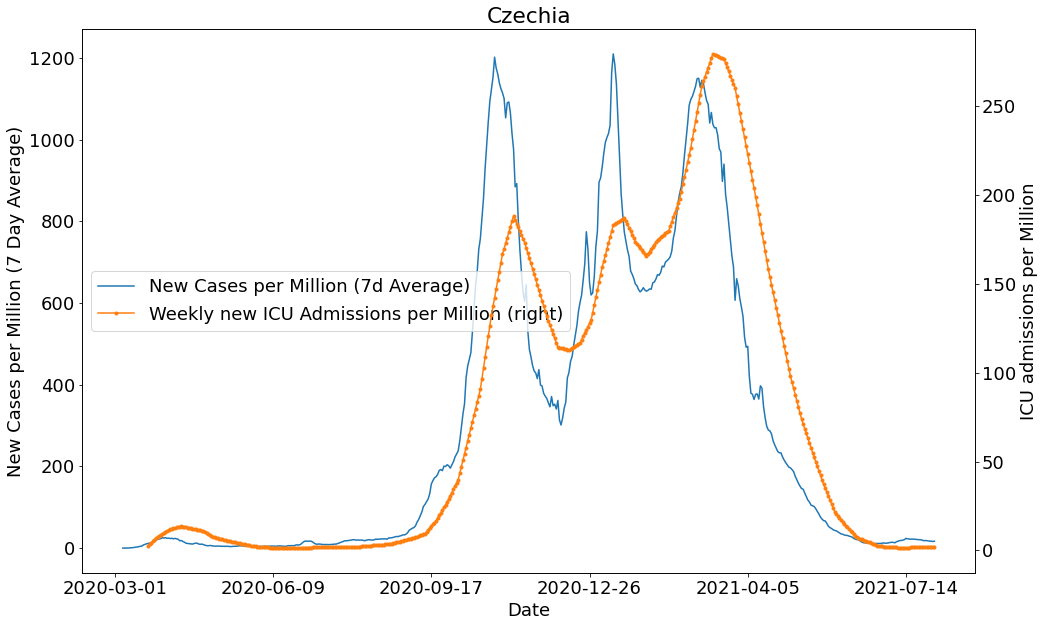

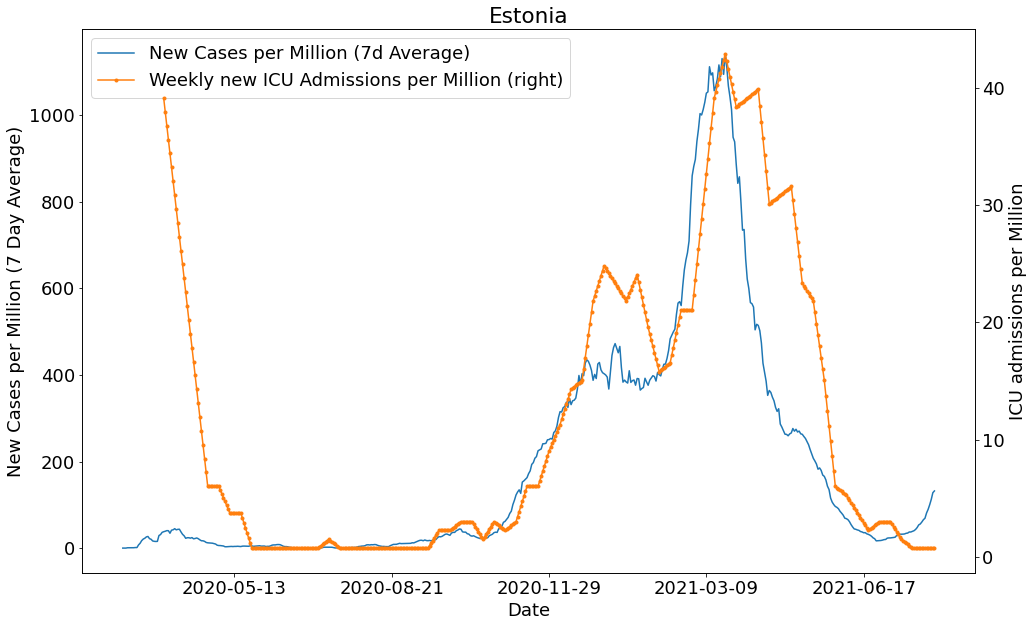

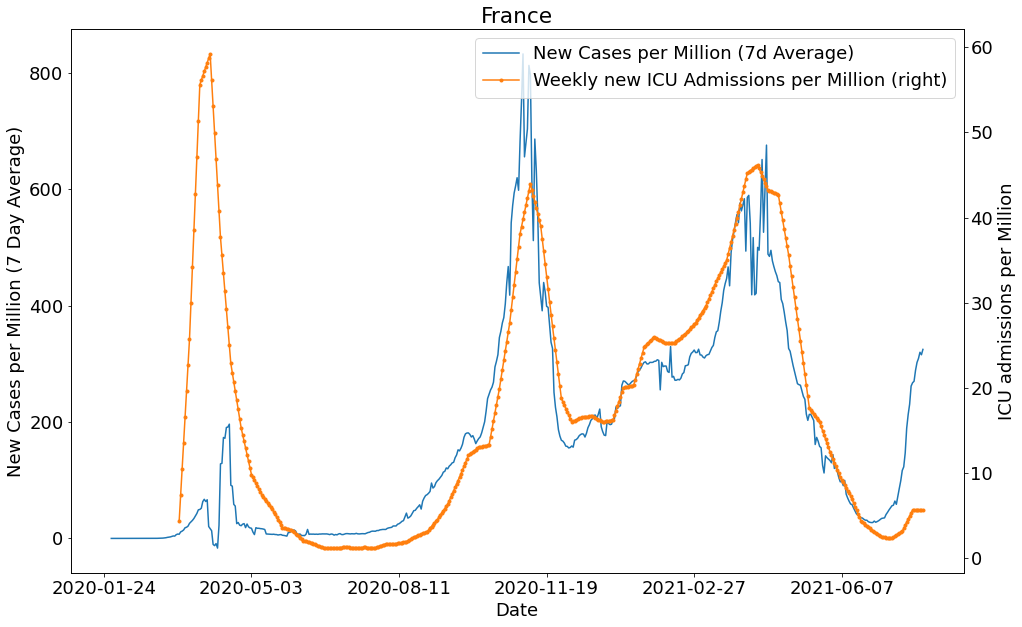

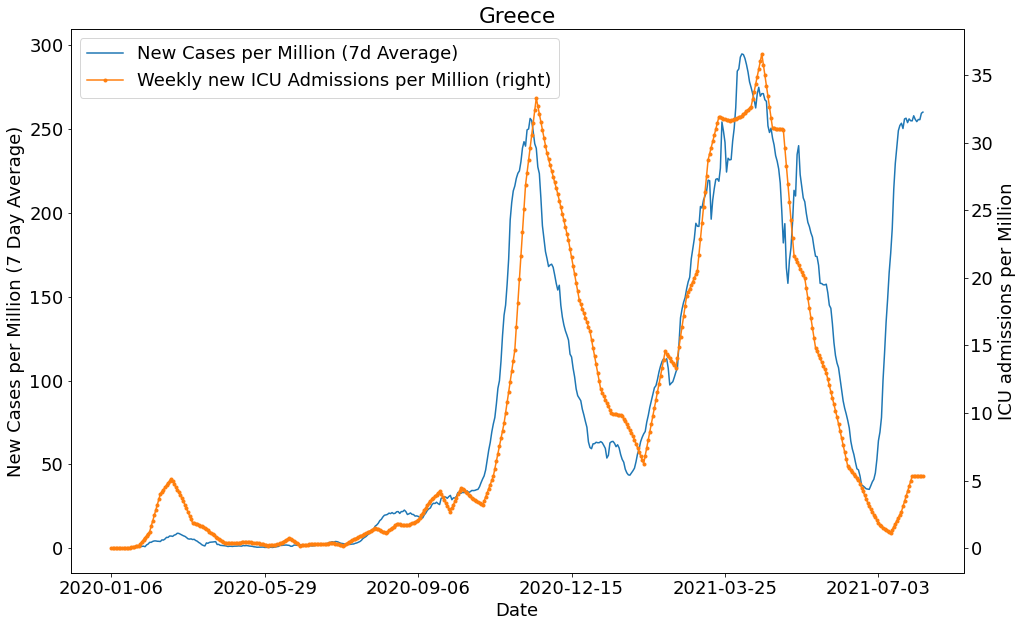

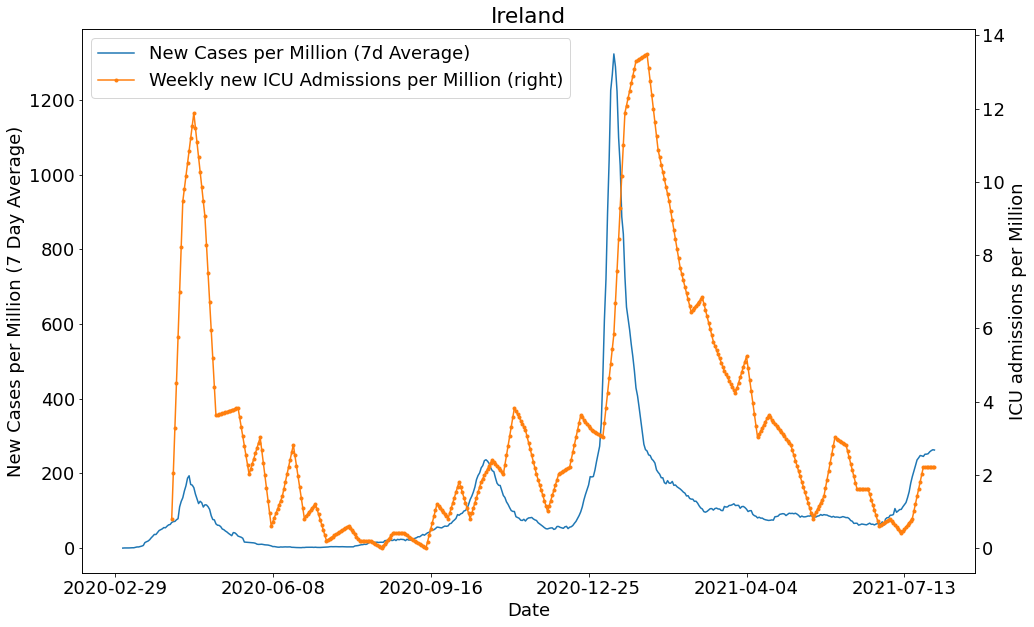

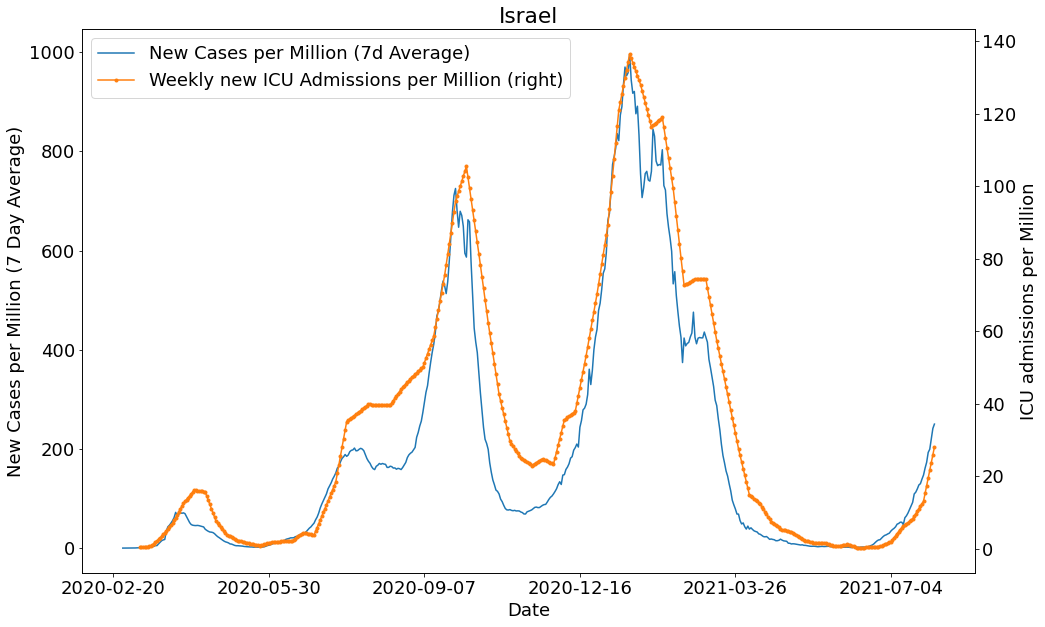

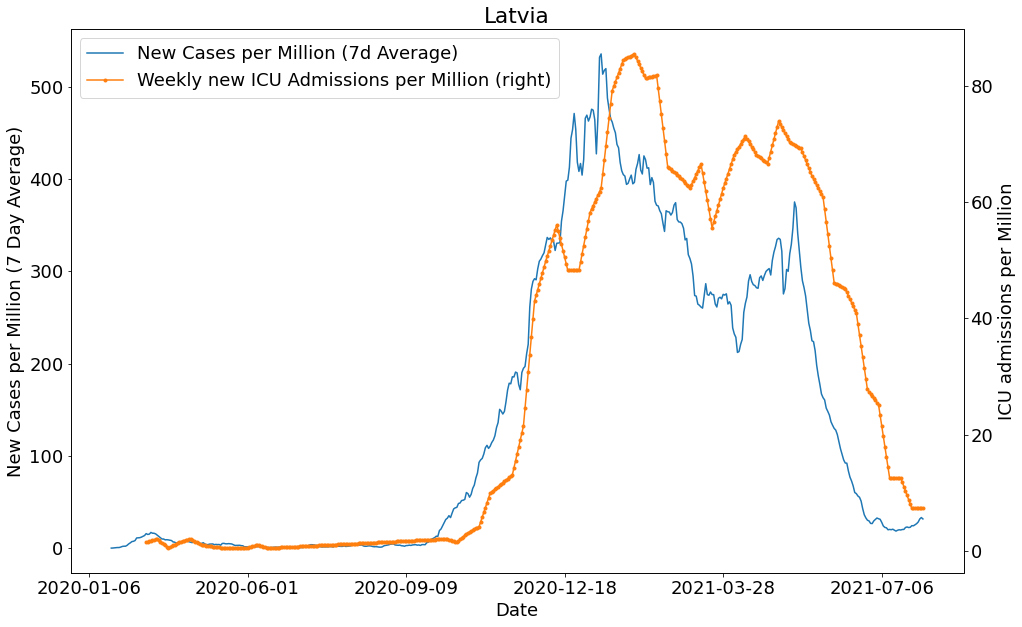

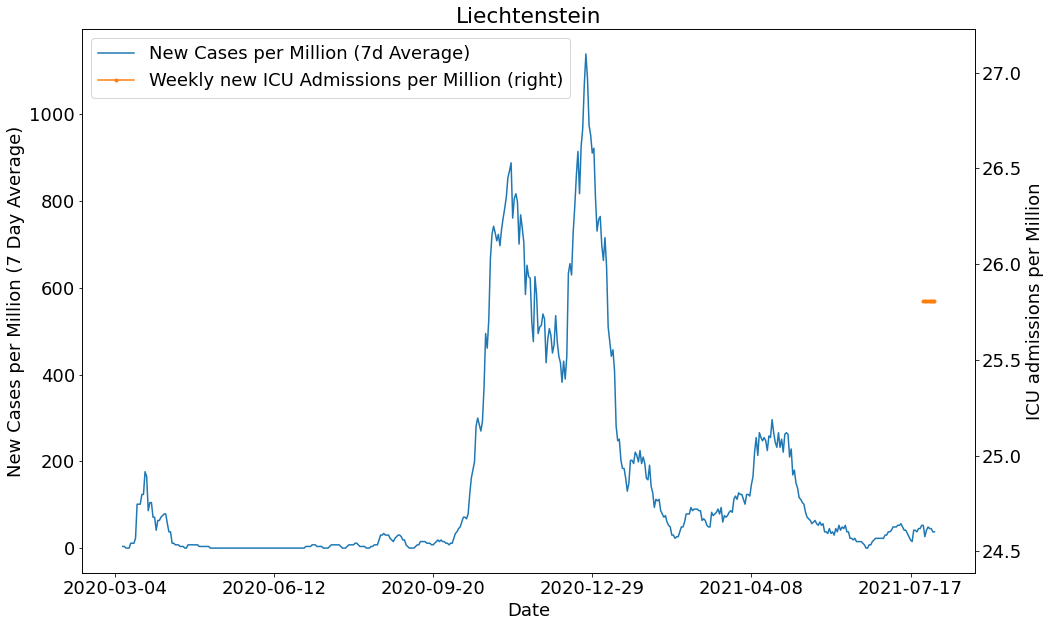

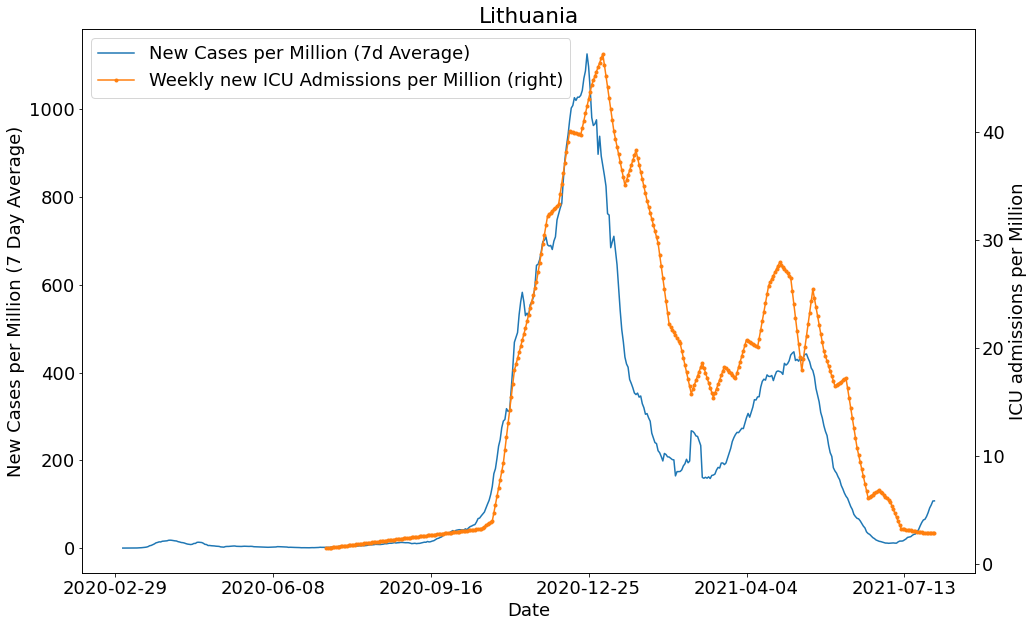

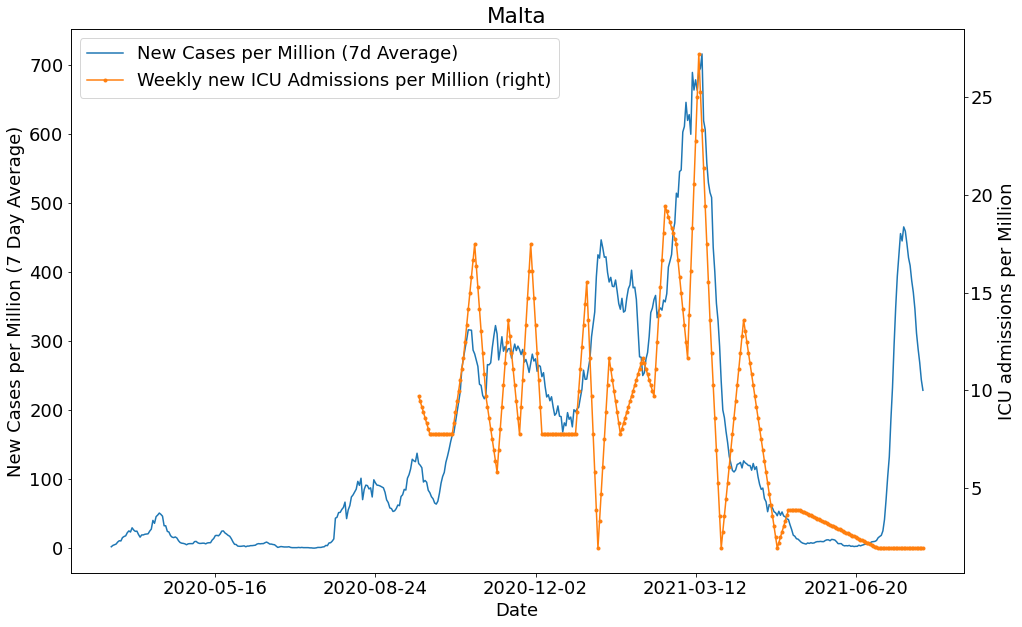

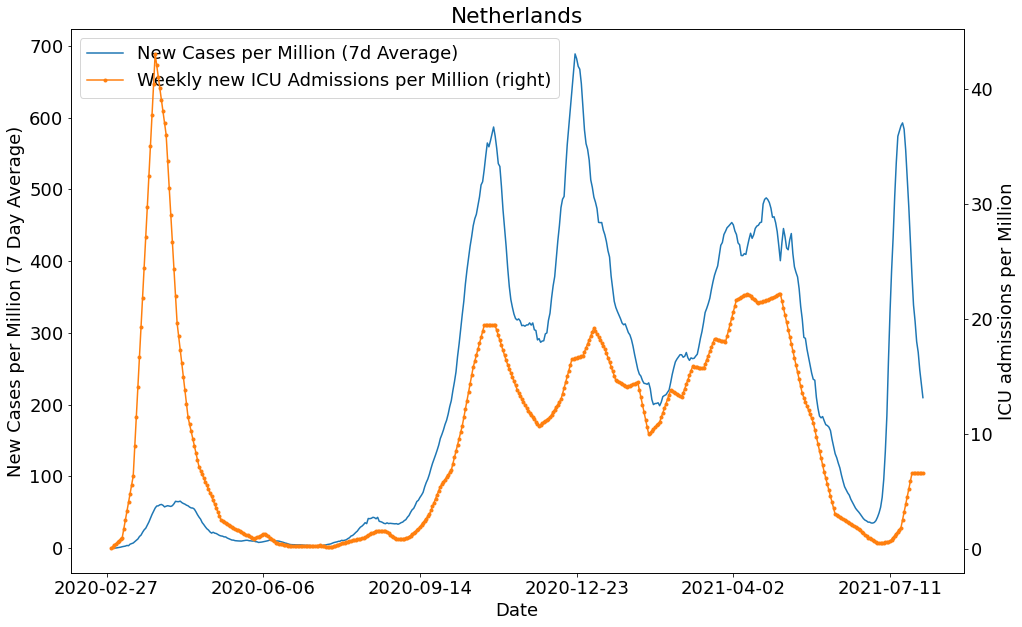

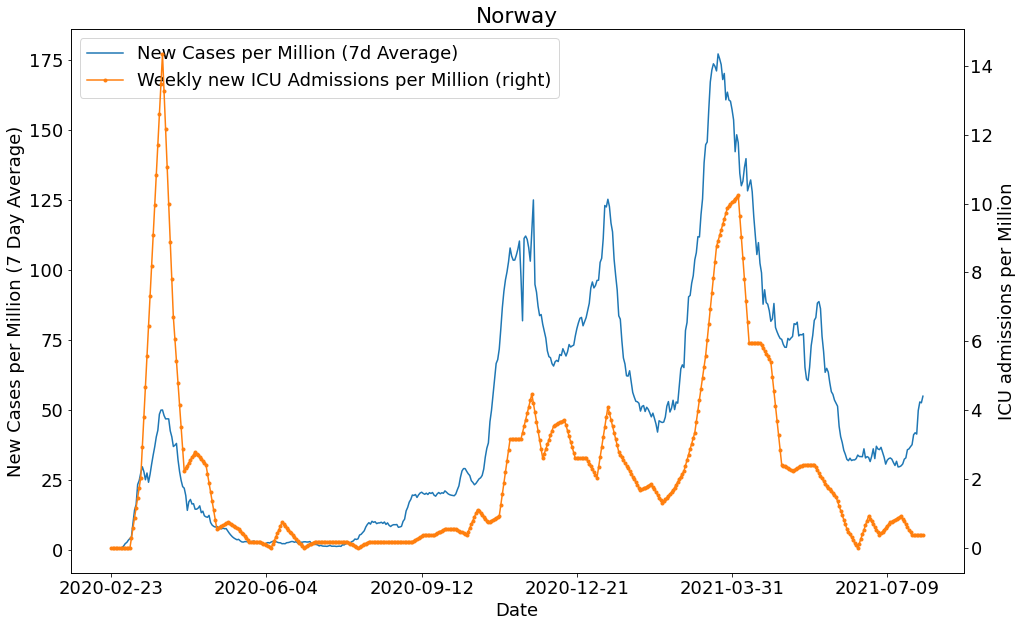

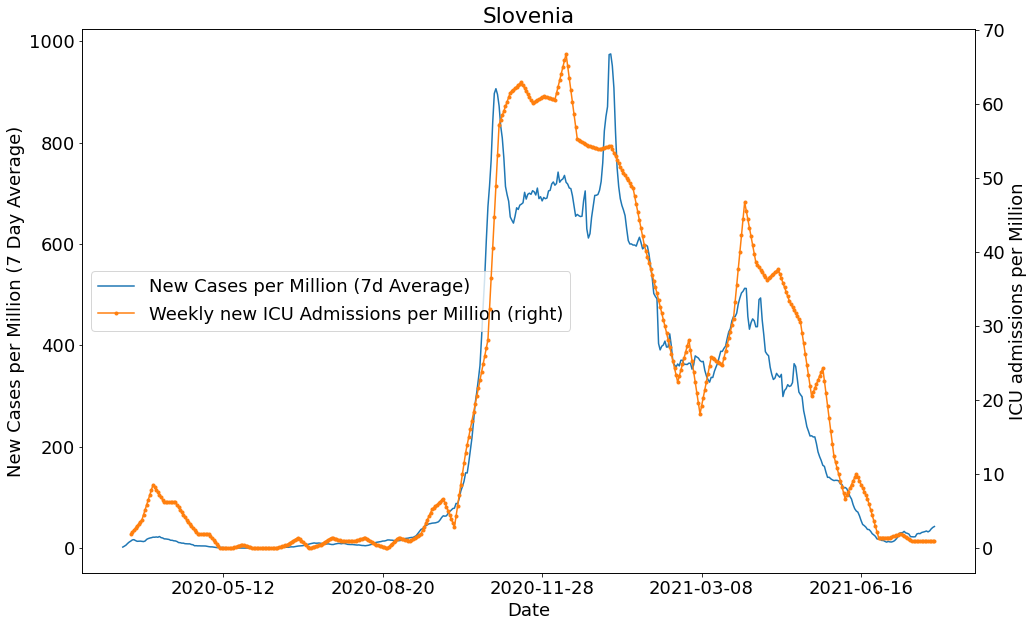

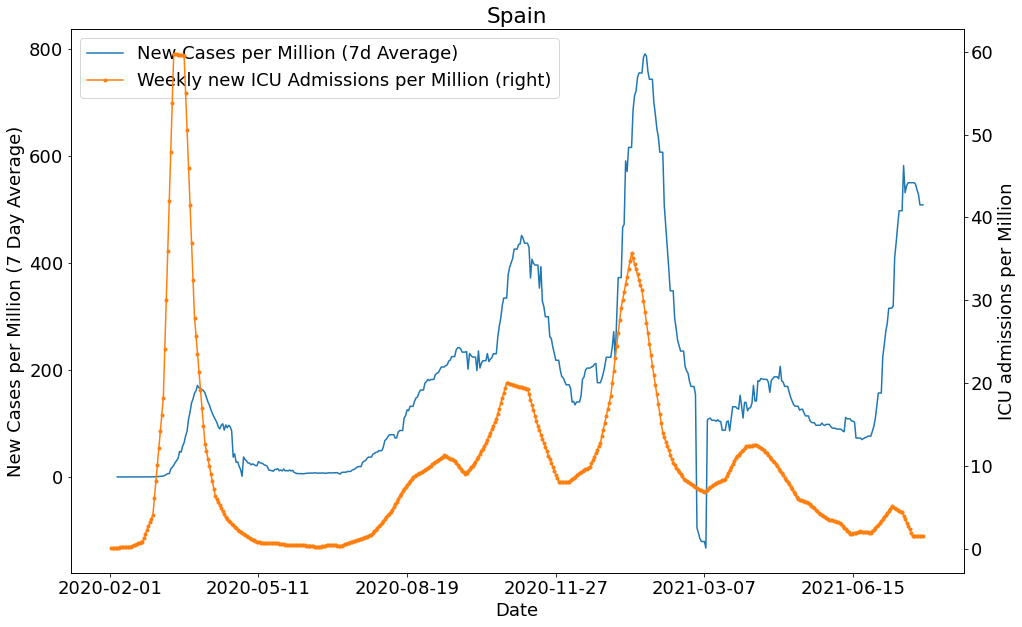

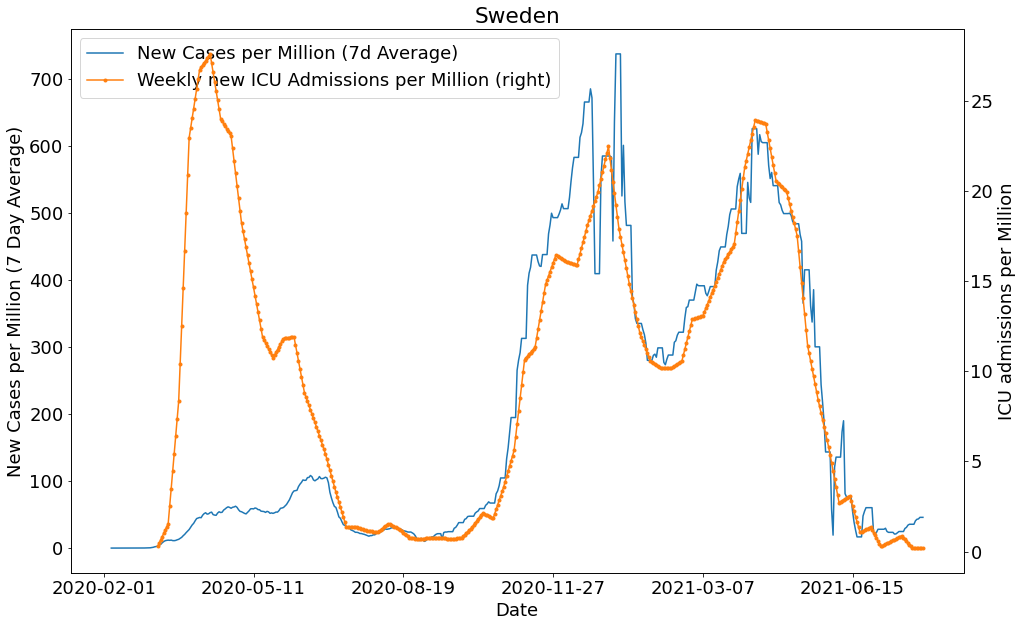

In [9]:
# Plot ICU ADMISSIONS and smoothed case numbers for these countries

for country in icu_admissions_countries:
    df = cases_icu_grouped.get_group(country)
    # interpolate weekly ICU admission linearly
    df.interpolate(method='linear', inplace=True)

    fig = plt.figure(figsize=(16, 10))
    cax = plt.gca()
    
    df.plot(x='date', y='new_cases_smoothed_per_million', kind='line', 
                  ylabel='New Cases per Million (7 Day Average)', ax=cax,
           label='New Cases per Million (7d Average)')
    df.plot(x='date', y='weekly_icu_admissions_per_million', kind='line', ax=cax,
            secondary_y=True, linestyle='solid', marker='.',
           label='Weekly new ICU Admissions per Million')
    cax.right_ax.set_ylabel('ICU admissions per Million')
    cax.set_xlabel('Date')
    cax.set_title(str(df['location'].unique()[0]))

    fig.savefig('fig4paper/icu_admissions/icu_admissions_' + country + '.pdf')

### ICU Occupancy

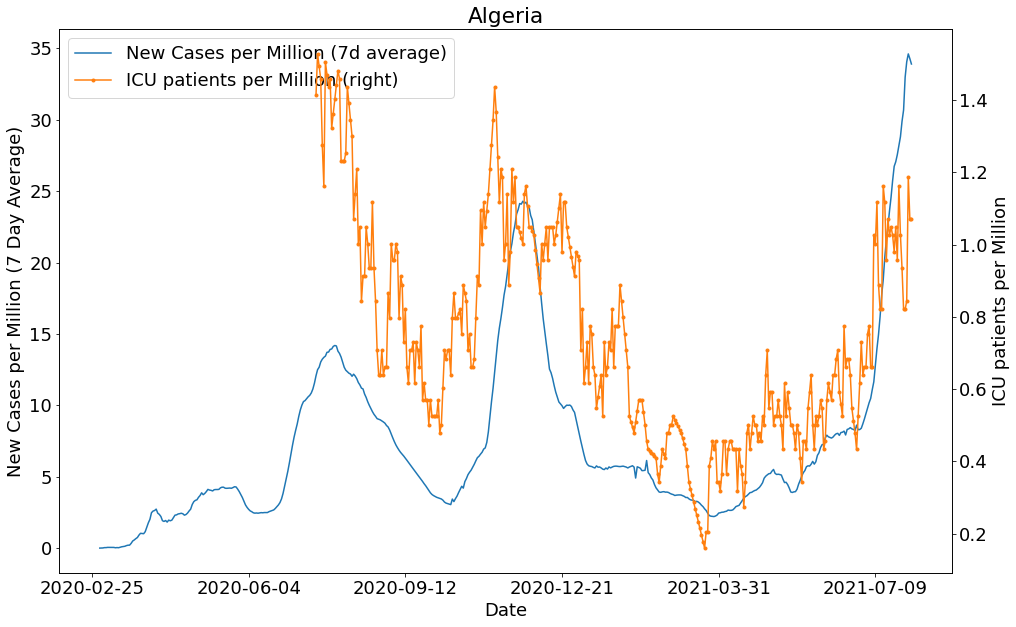

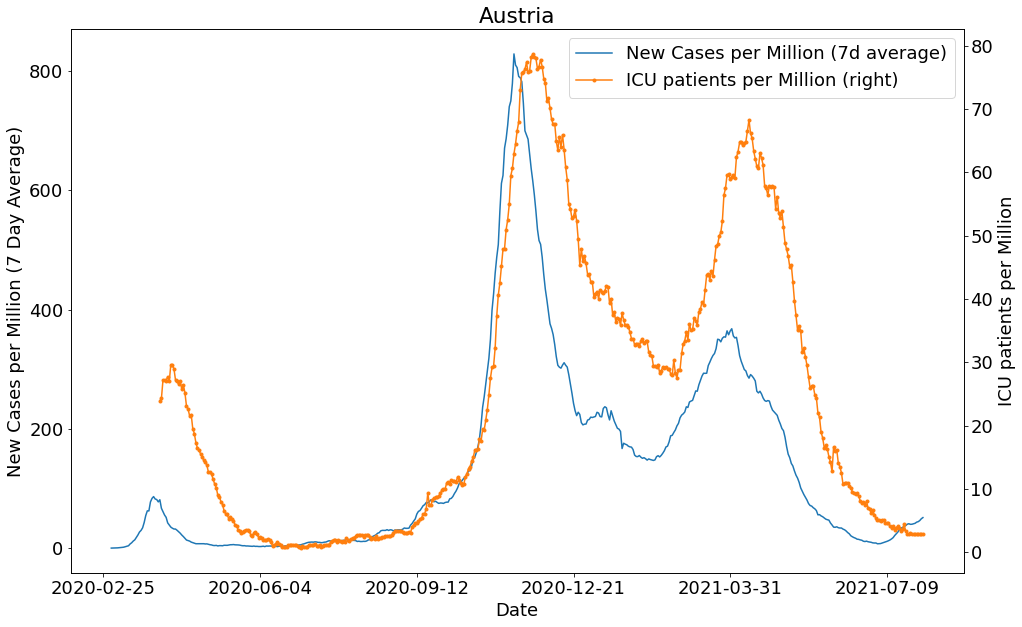

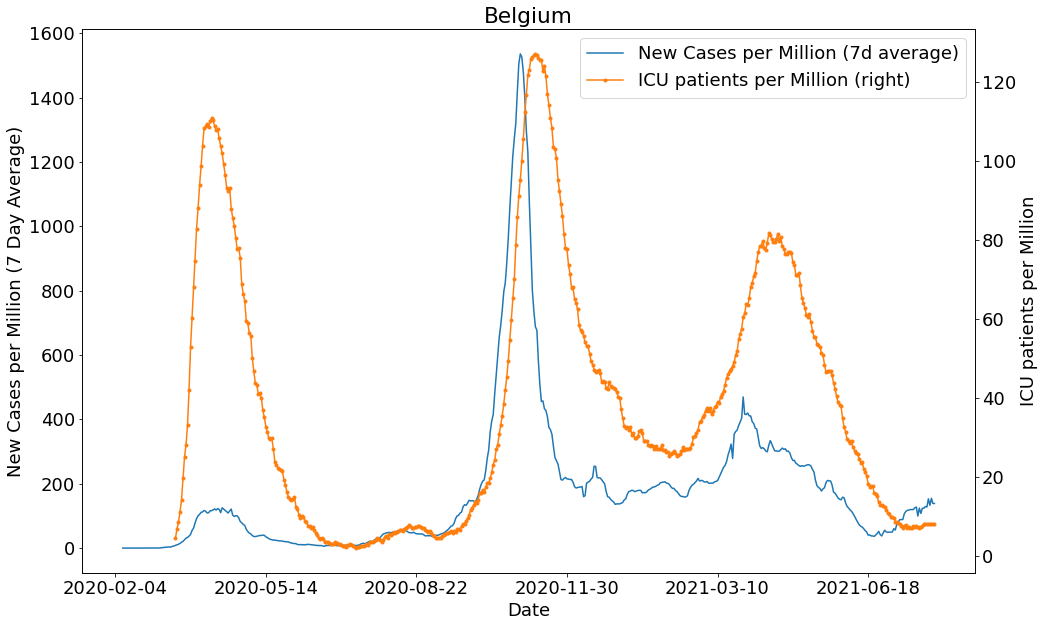

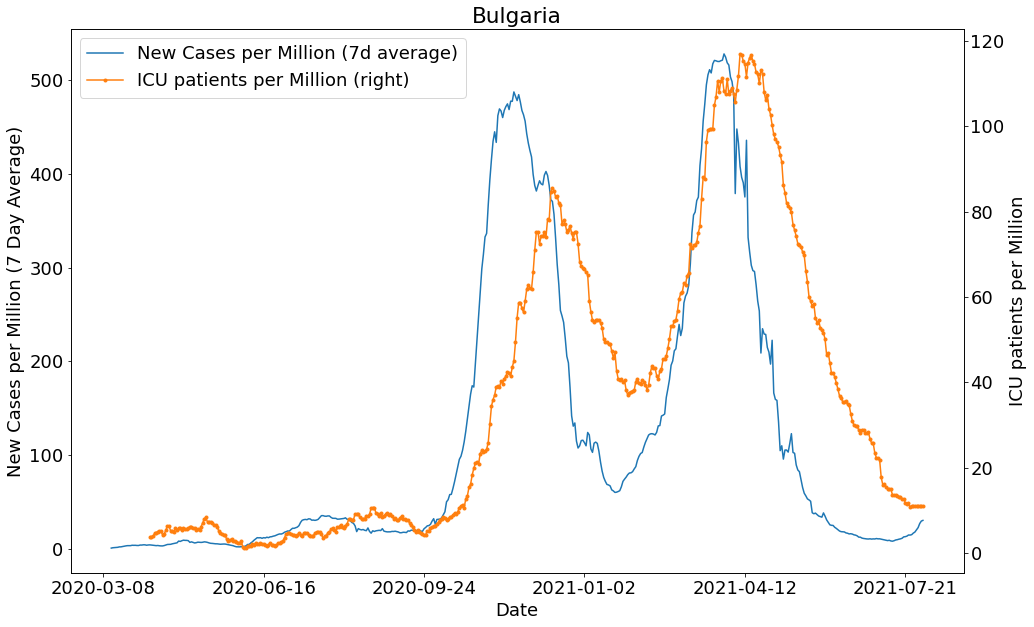

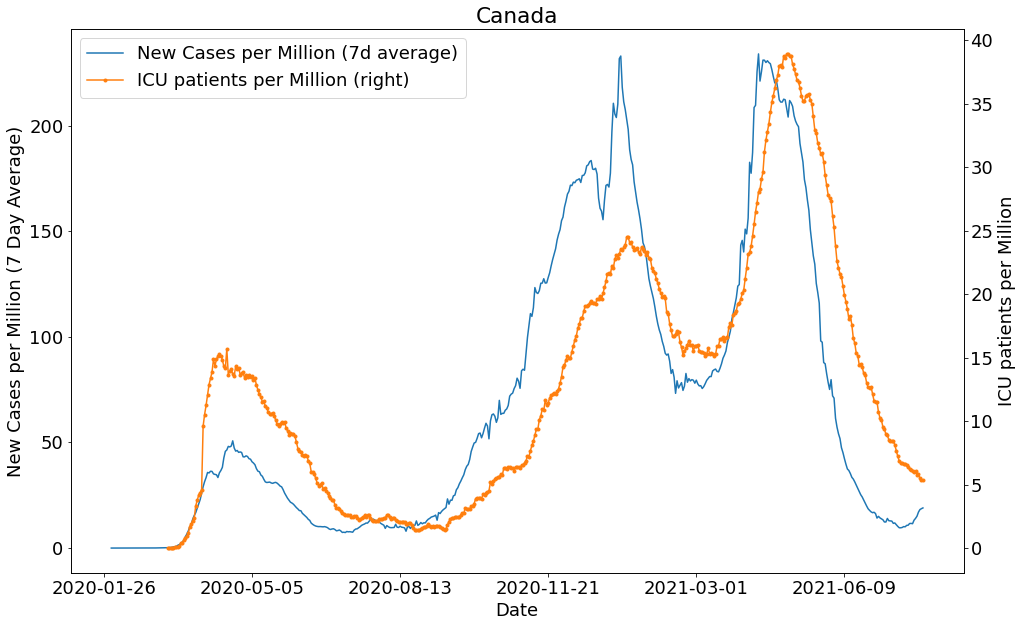

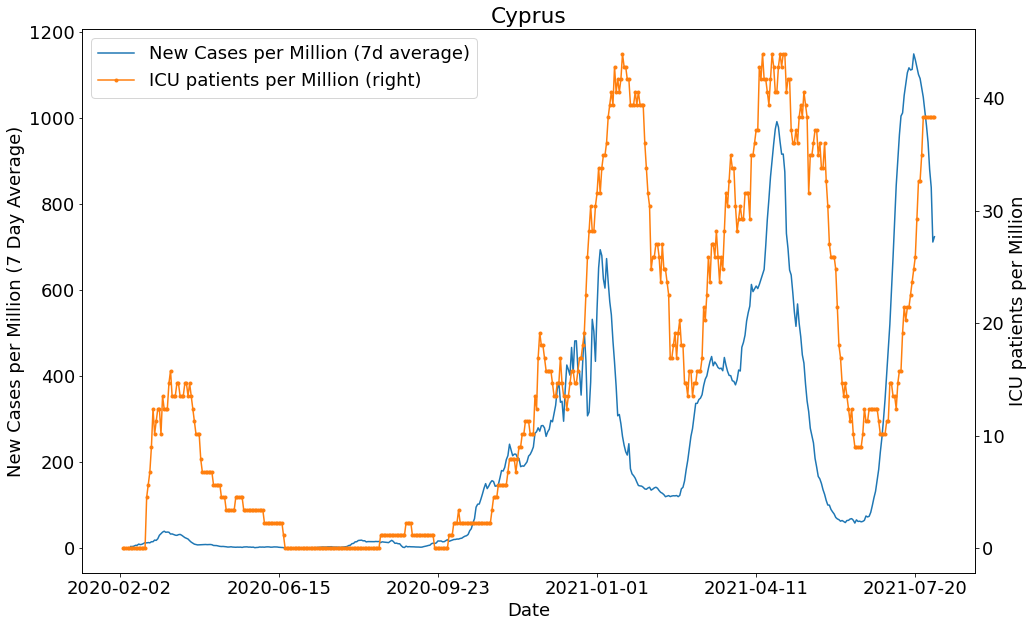

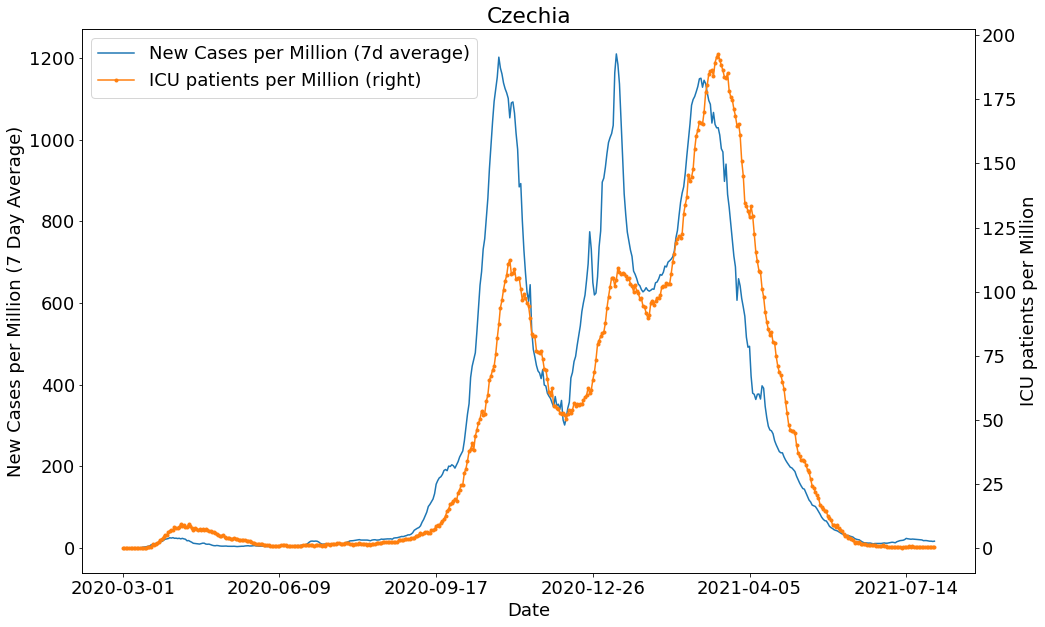

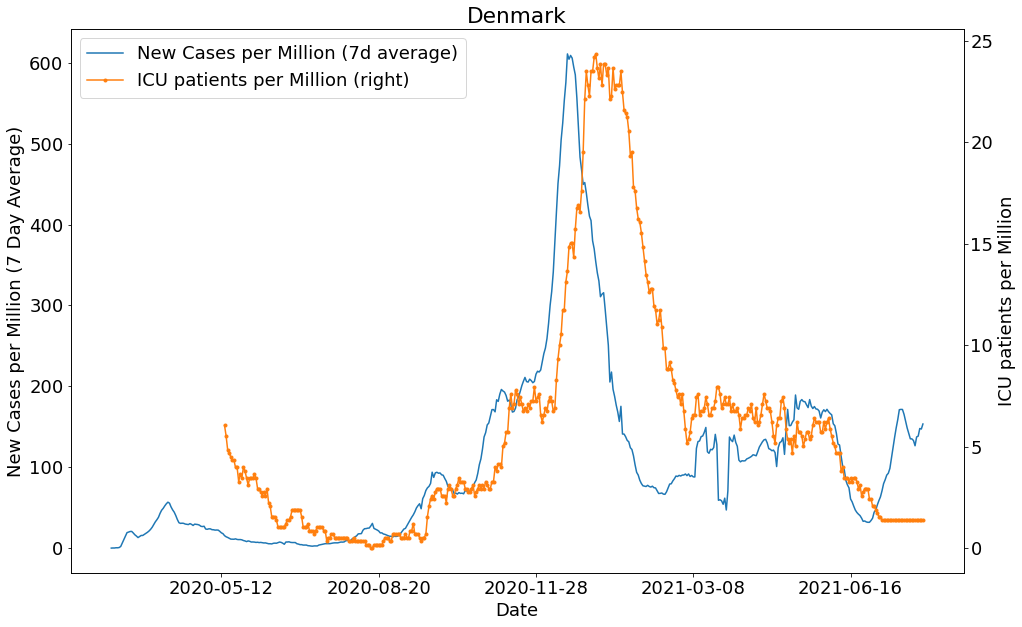

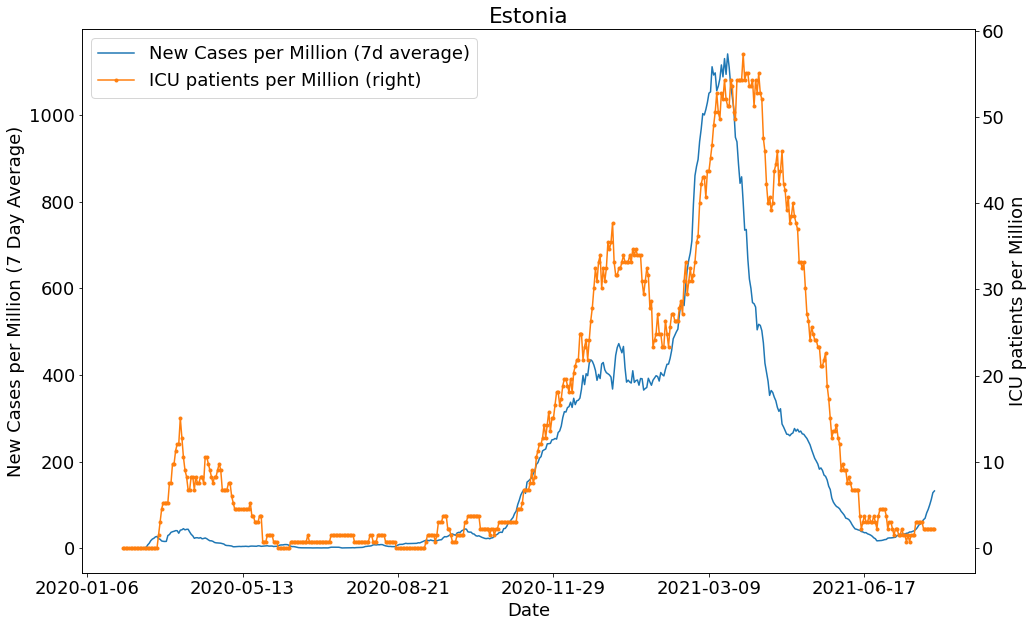

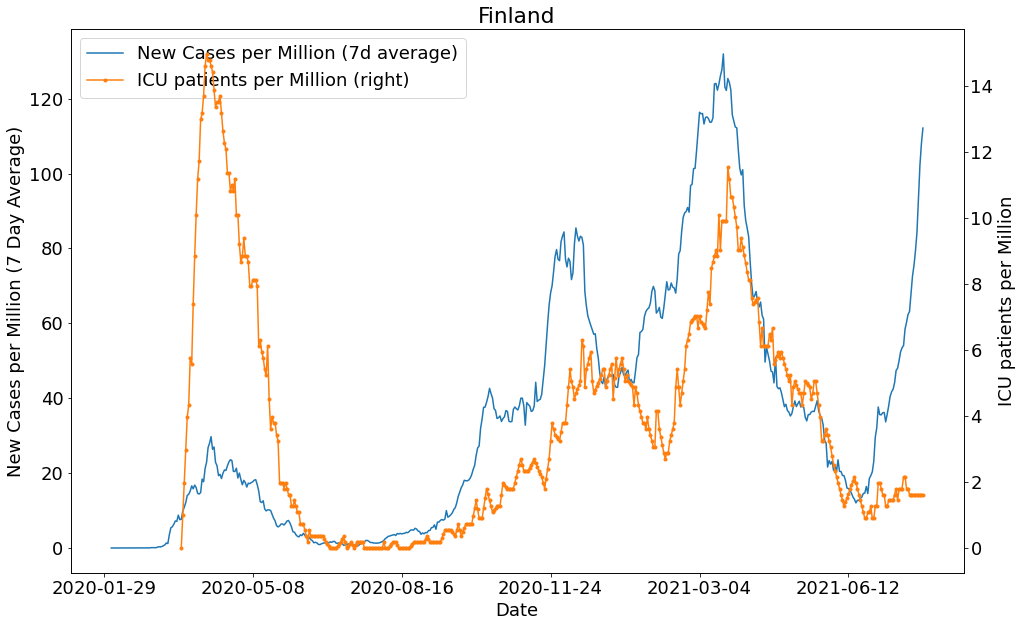

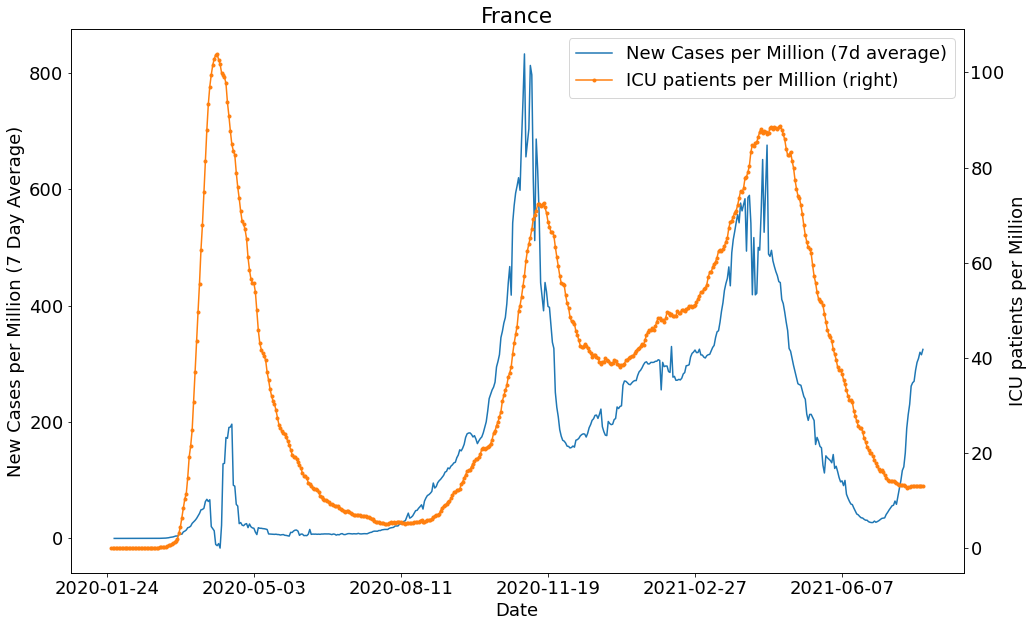

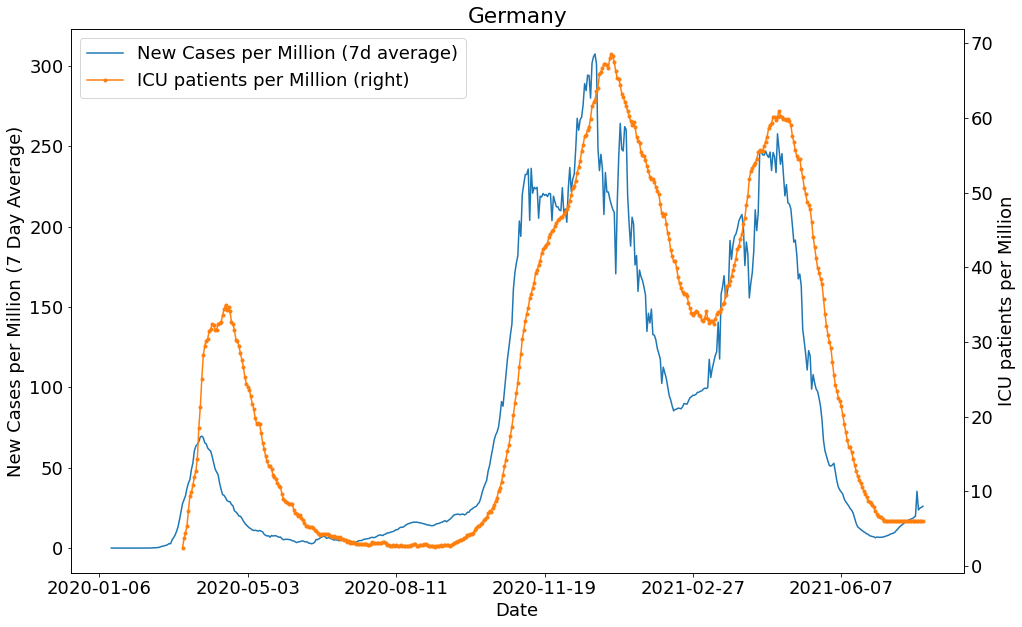

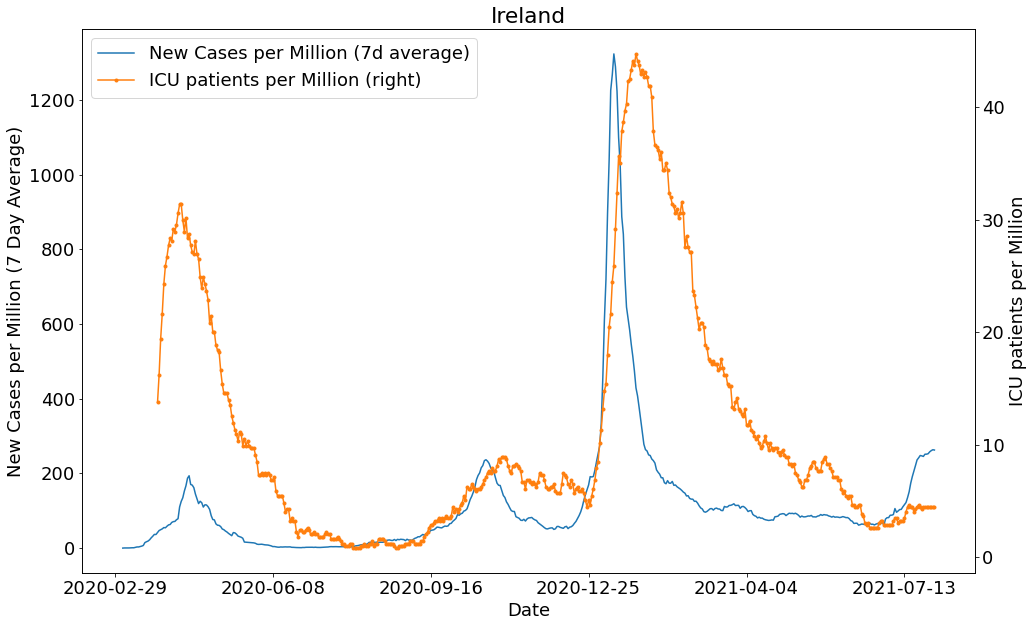

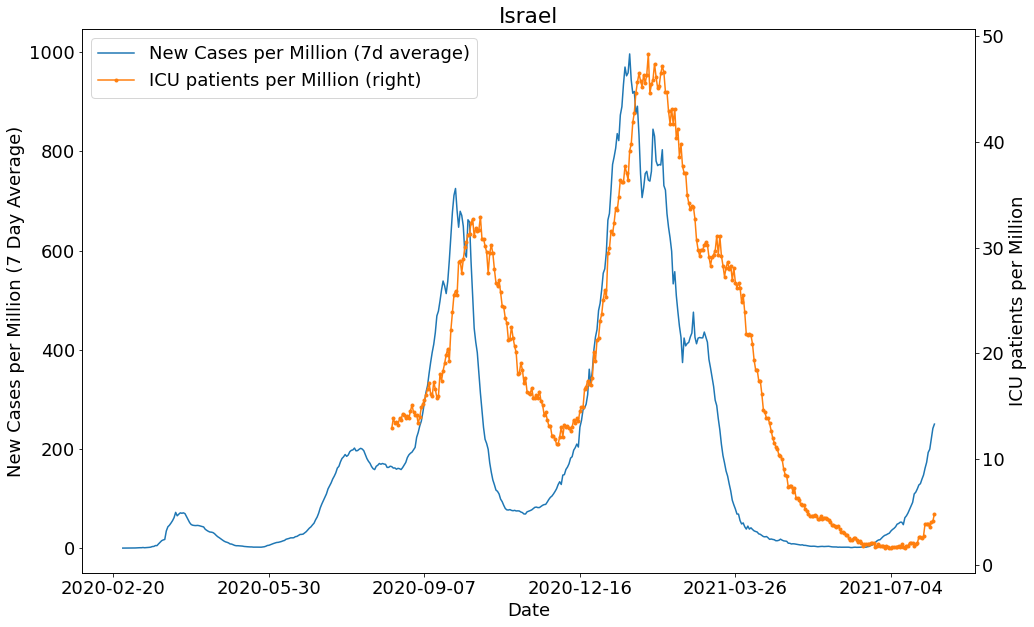

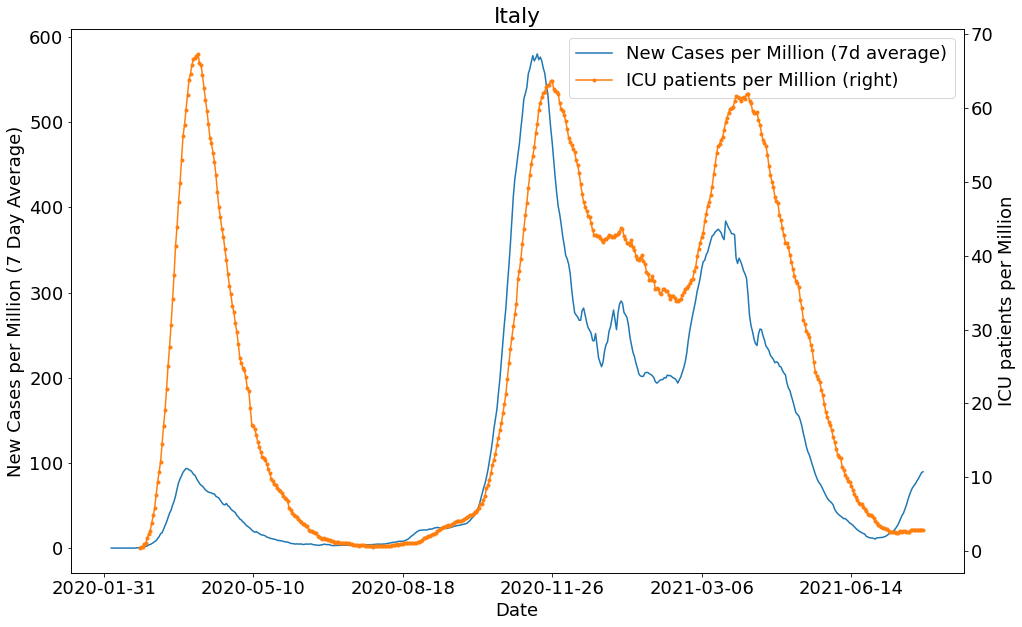

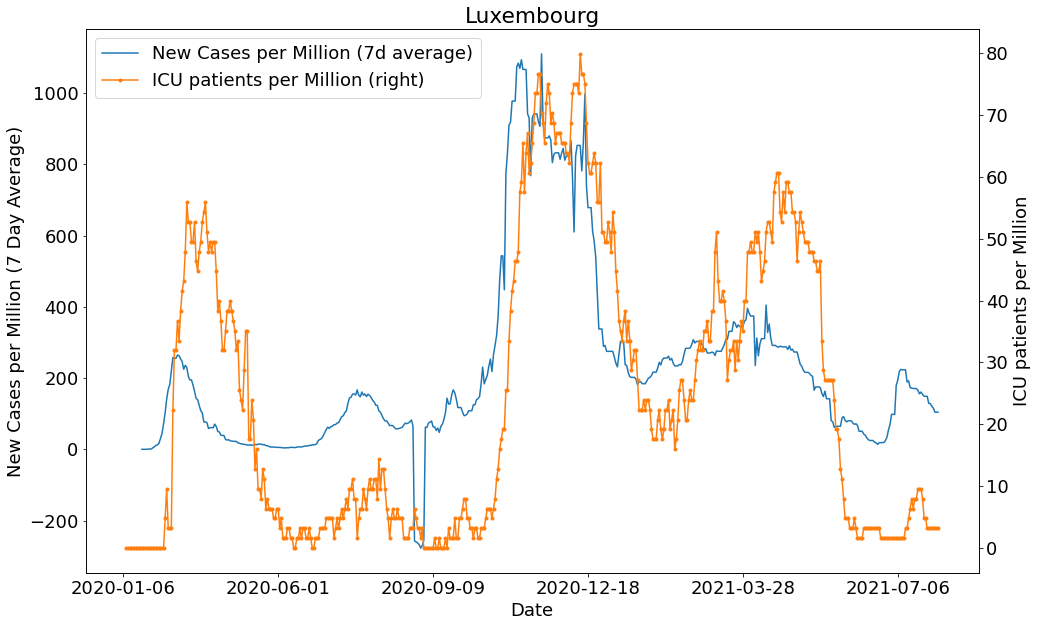

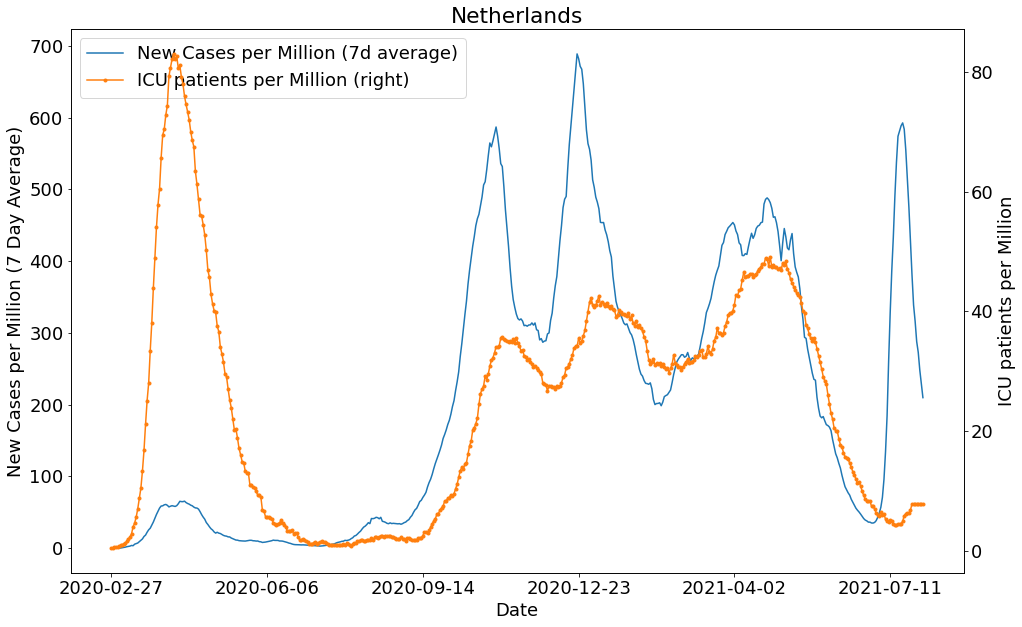

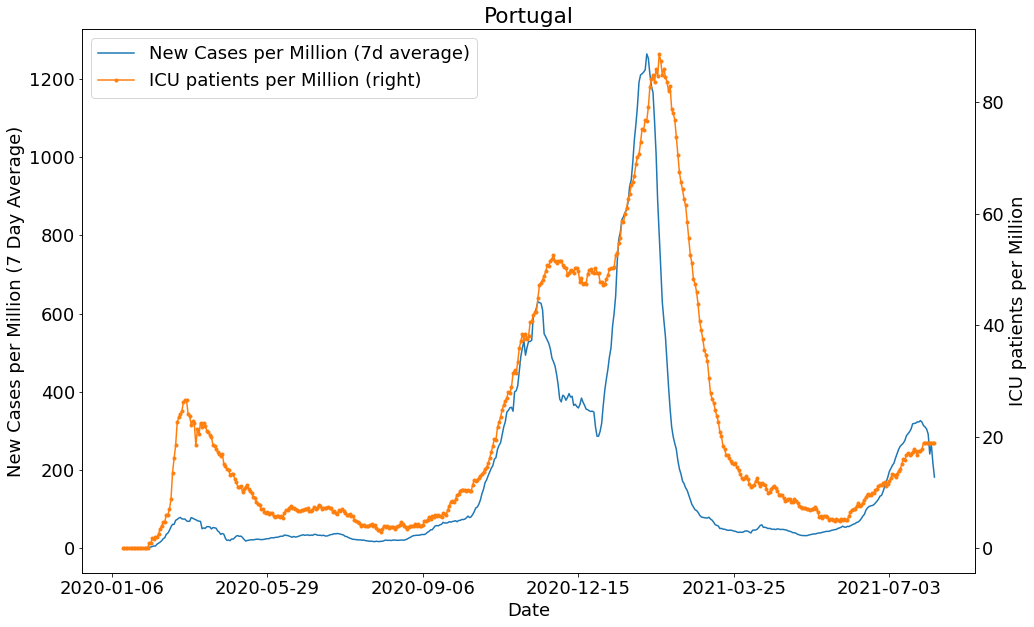

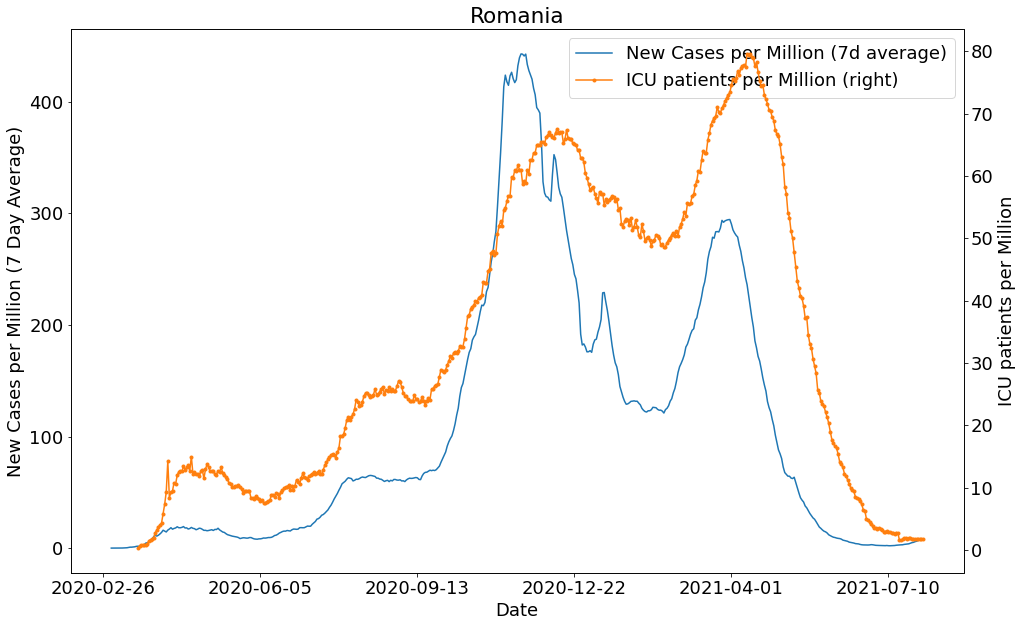

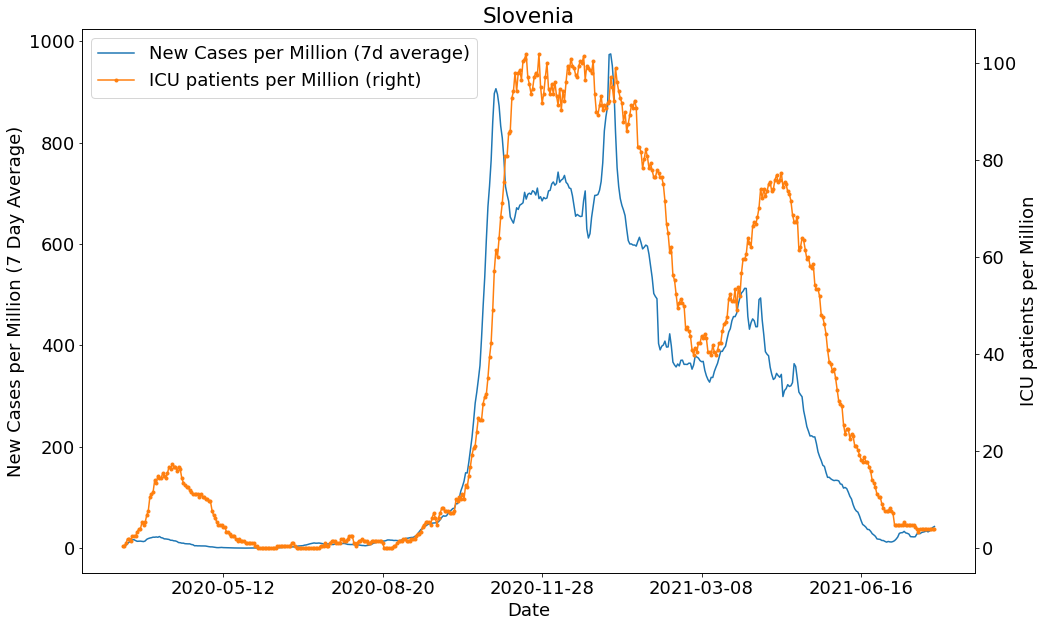

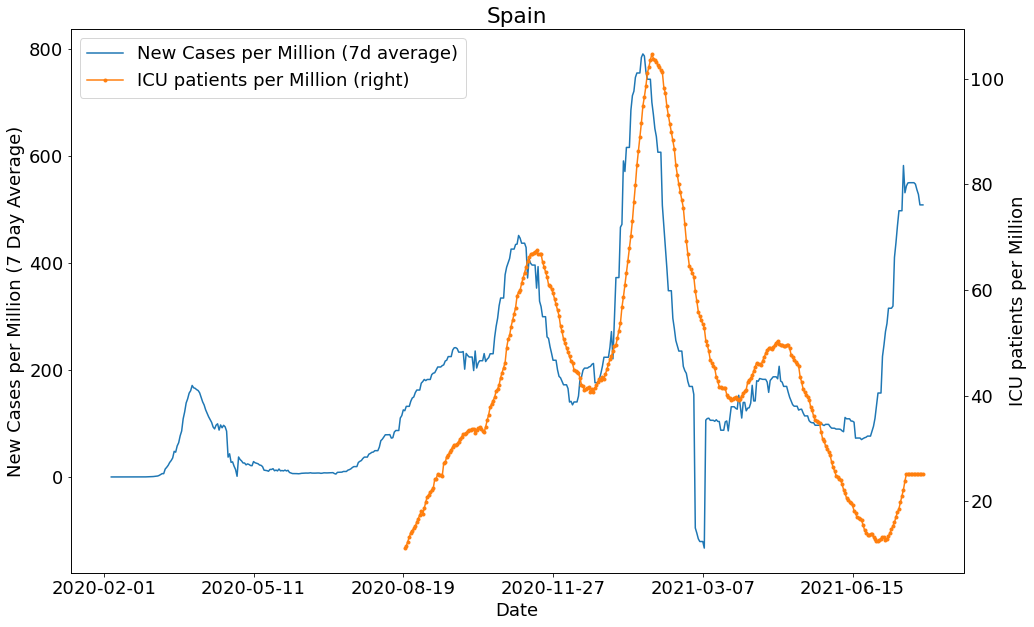

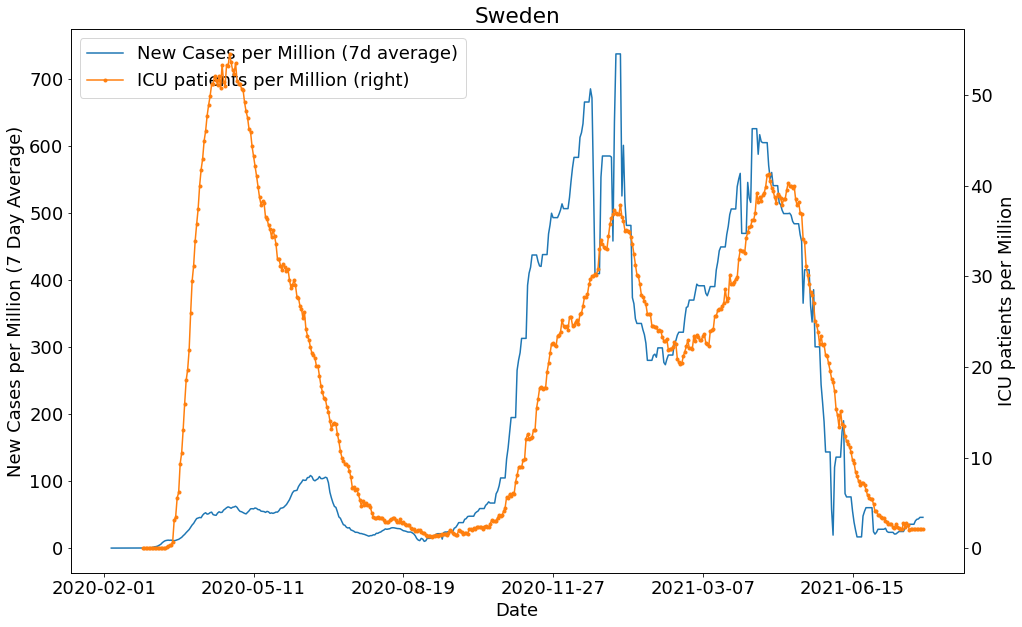

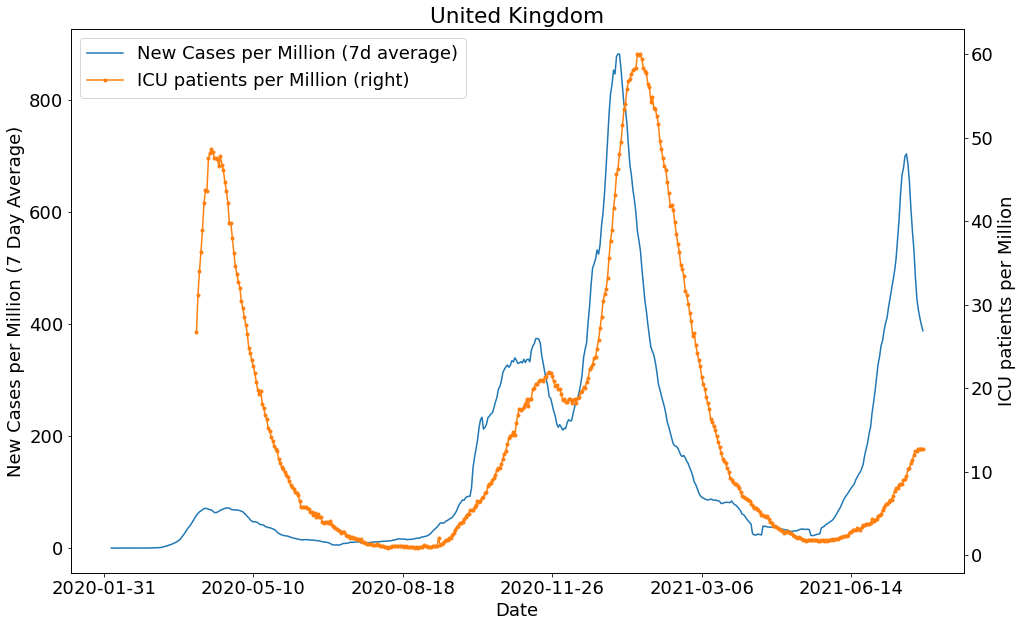

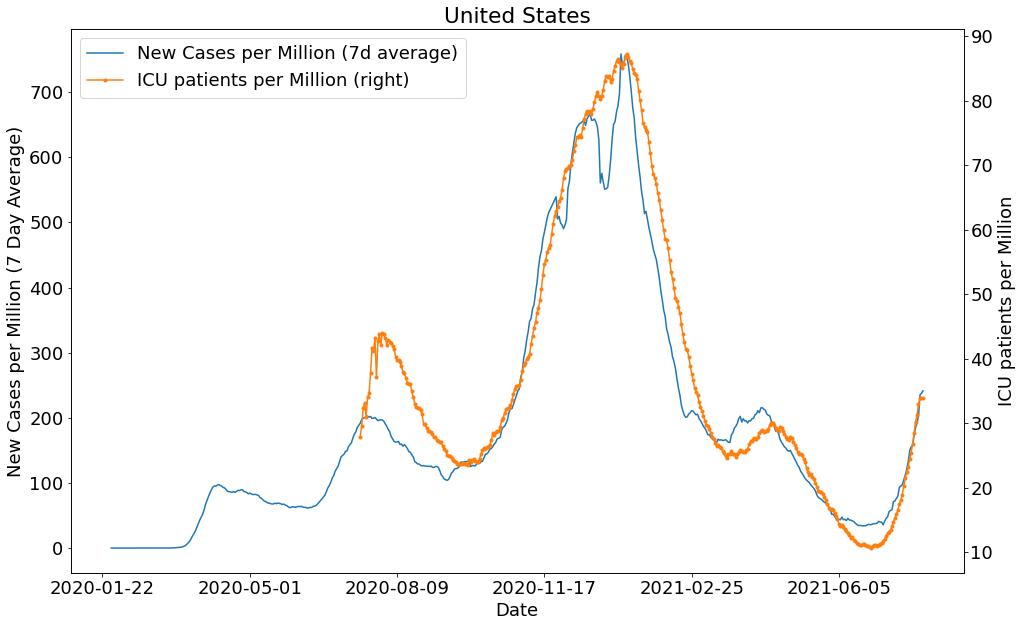

In [10]:
# Plot ICU OCCUPANCY and smoothed case numbers for these countries

for country in icu_countries:
    df = cases_icu_grouped.get_group(country)
    # interpolate ICU occupancy linearly
    df.interpolate(method='linear', inplace=True)

    fig = plt.figure(figsize=(16, 10))
    cax = plt.gca()
    
    df.plot(x='date', y='new_cases_smoothed_per_million', kind='line', 
                  ylabel='New Cases per Million (7 Day Average)', ax=cax,
           label='New Cases per Million (7d average)')
    df.plot(x='date', y='icu_patients_per_million', kind='line', ax=cax,
            secondary_y=True, linestyle='solid', marker='.',
           label='ICU patients per Million')
    cax.right_ax.set_ylabel('ICU patients per Million')
    cax.set_xlabel('Date')
    cax.set_title(str(df['location'].unique()[0]))

    fig.savefig('fig4paper/icu_occupancy/icu_occupancy_' + country + '.pdf')

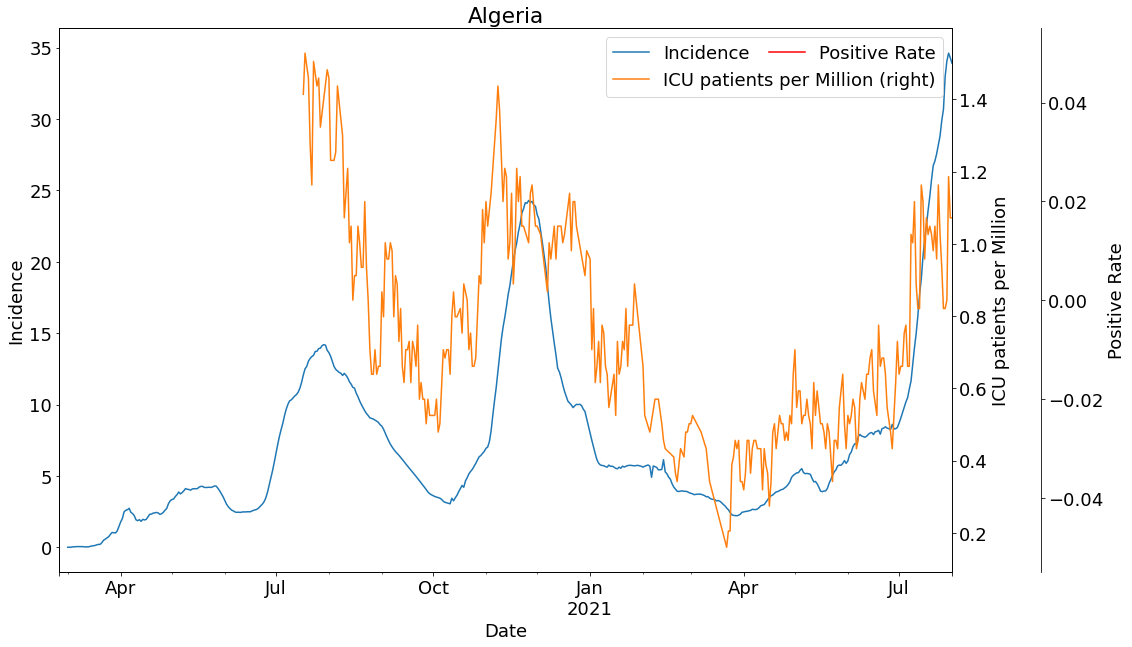

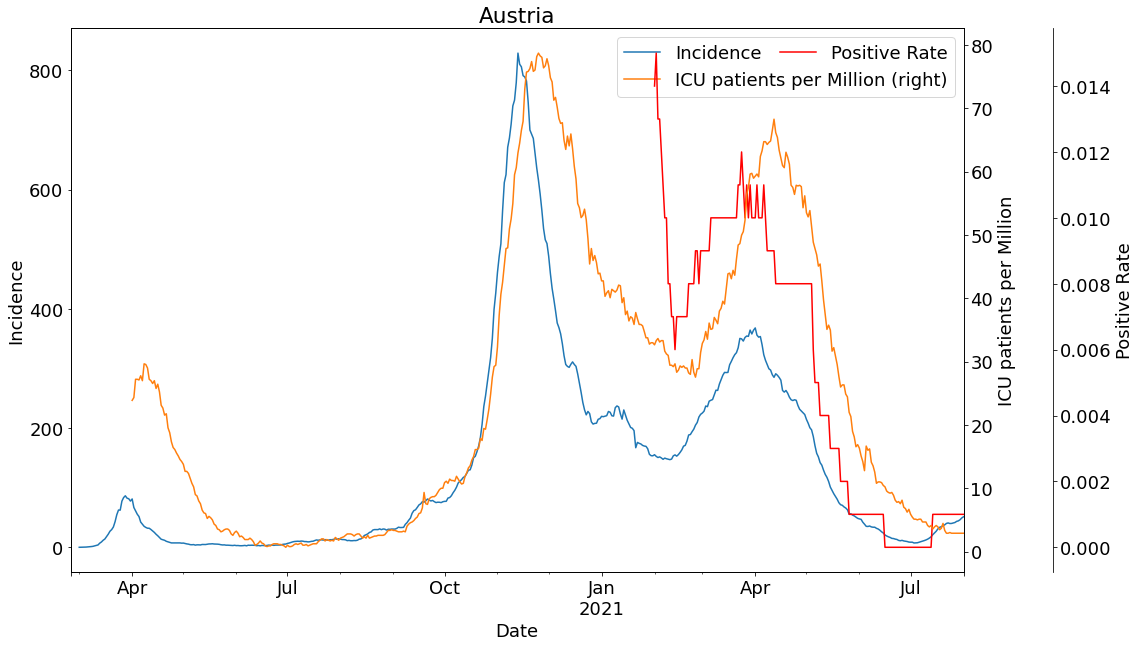

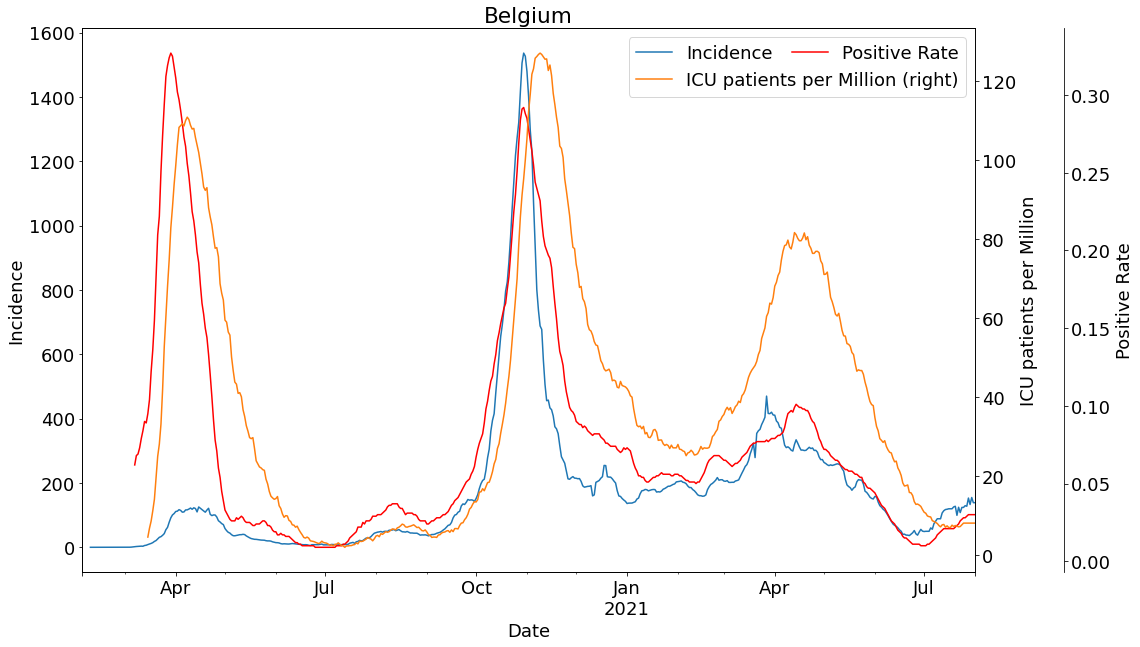

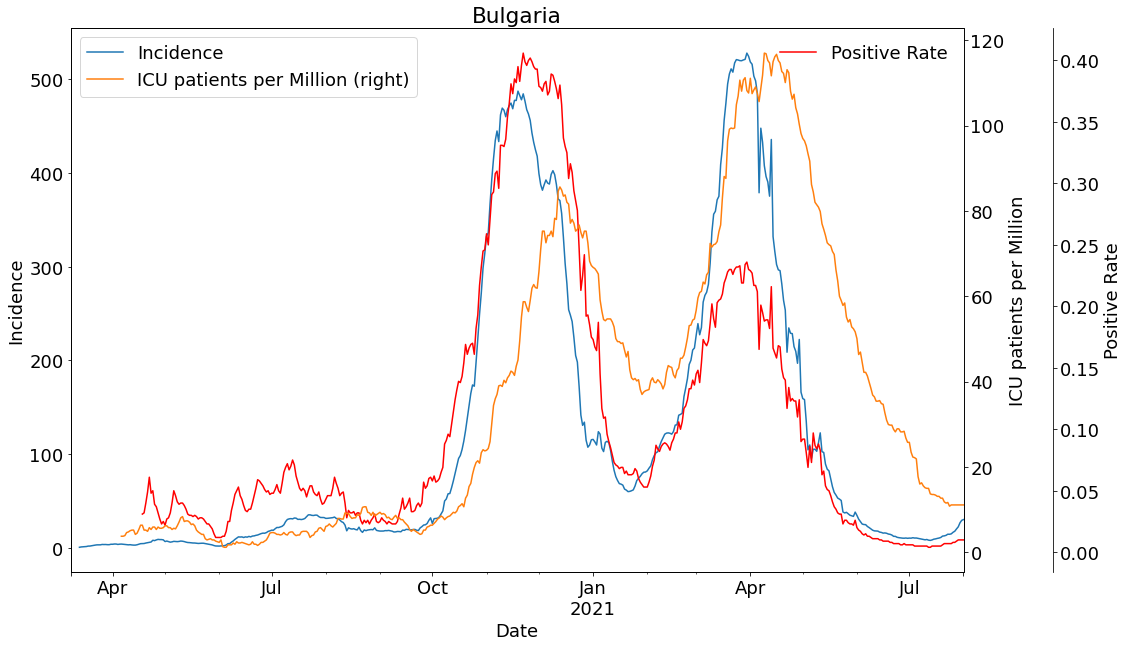

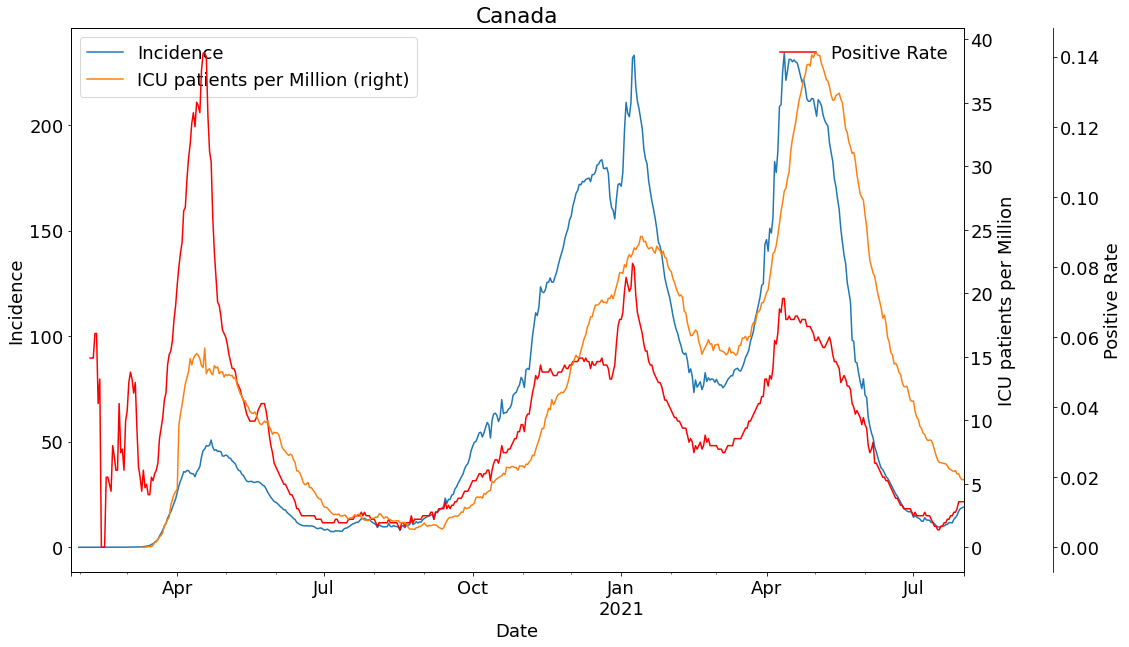

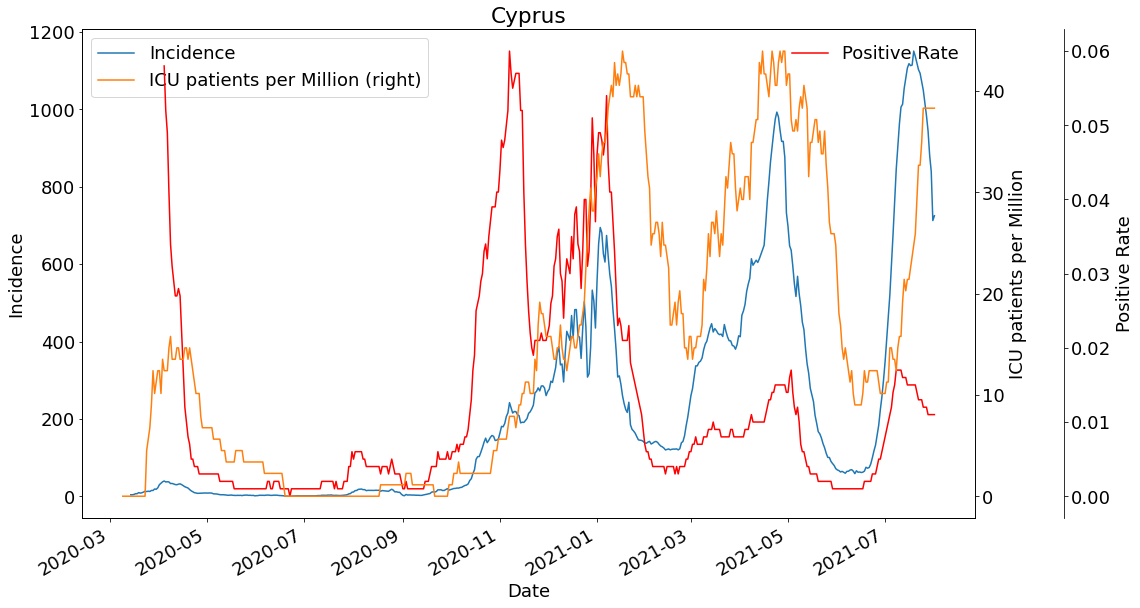

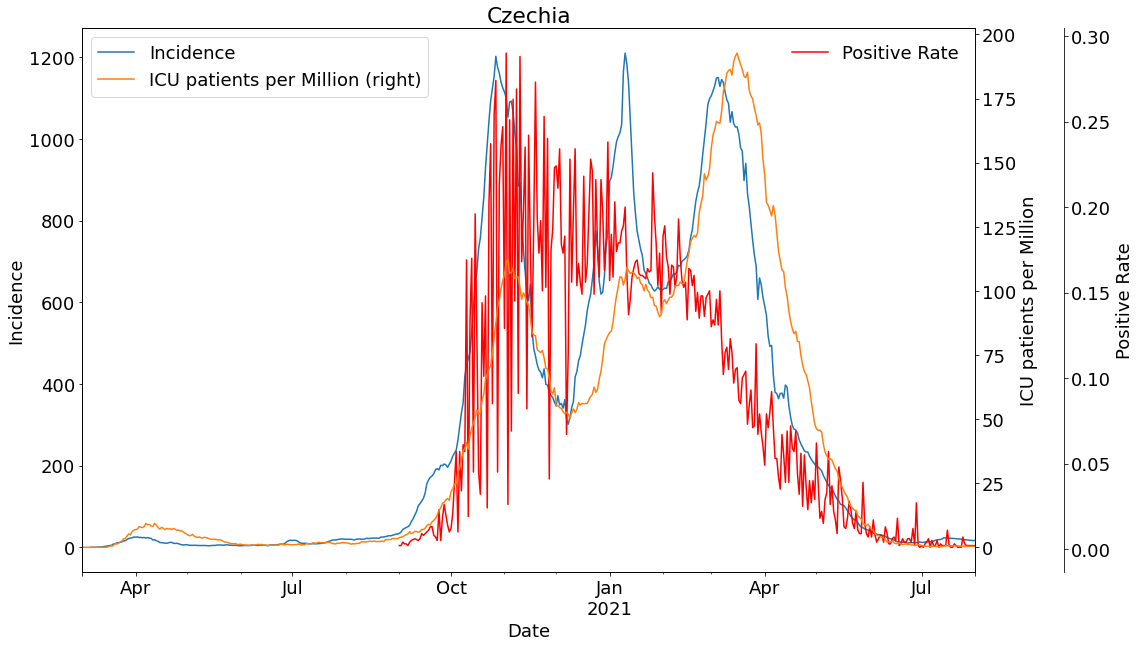

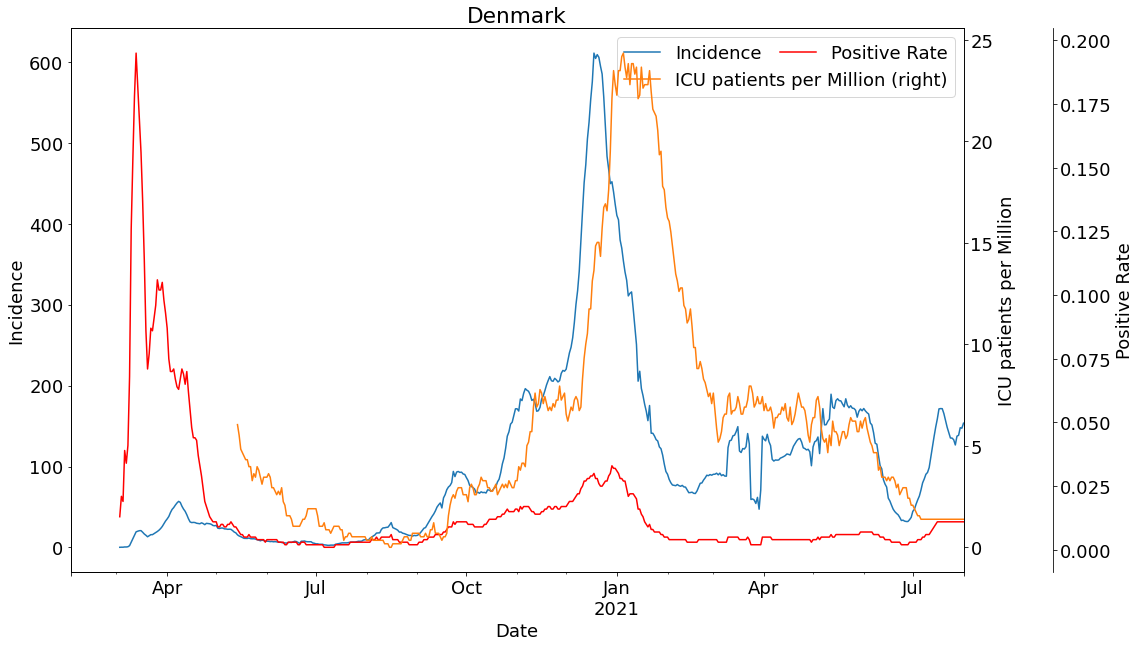

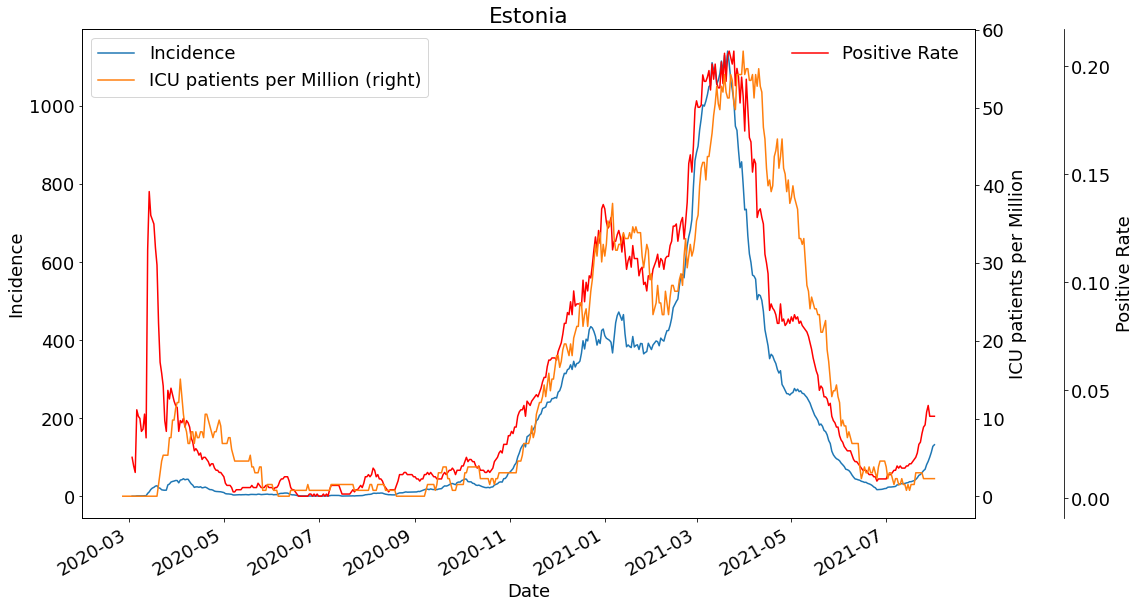

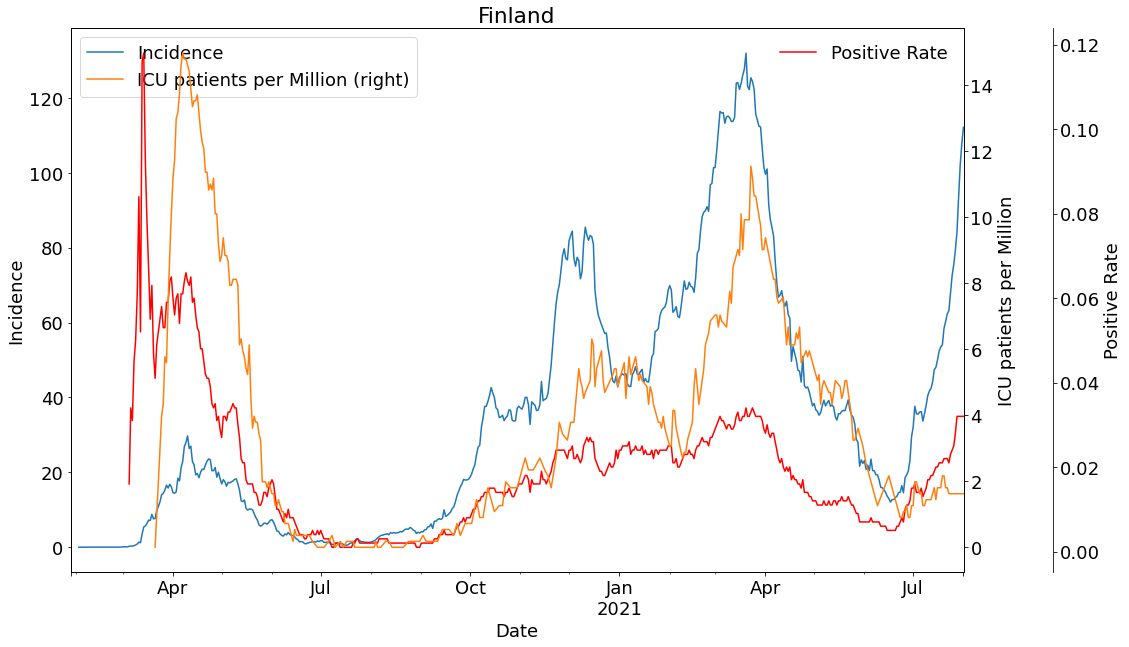

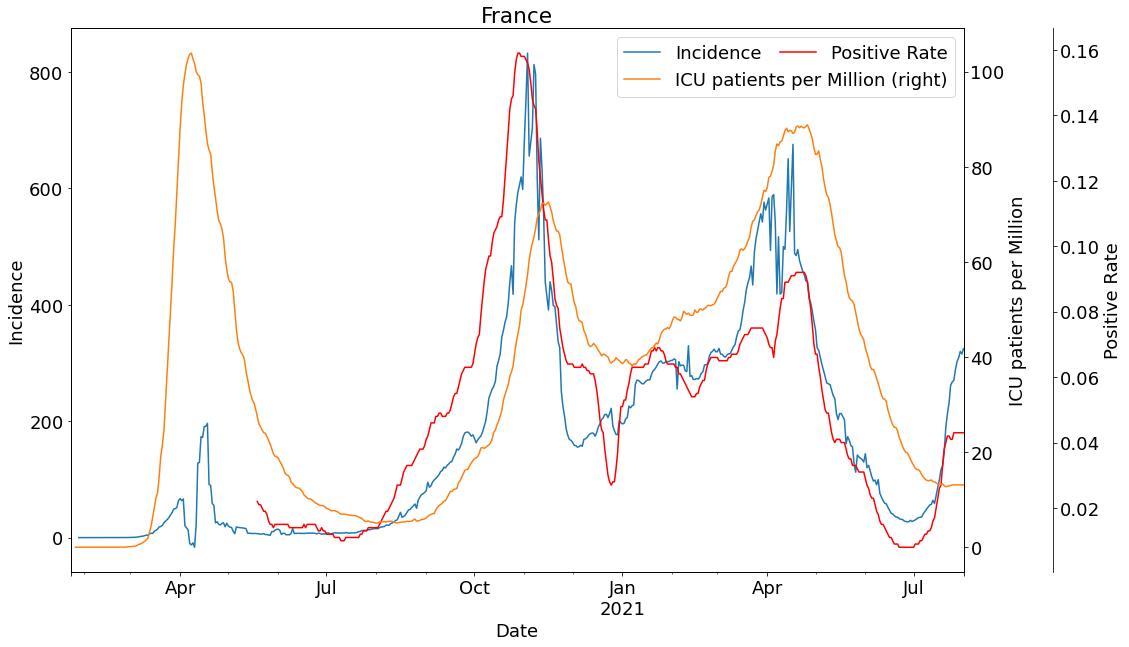

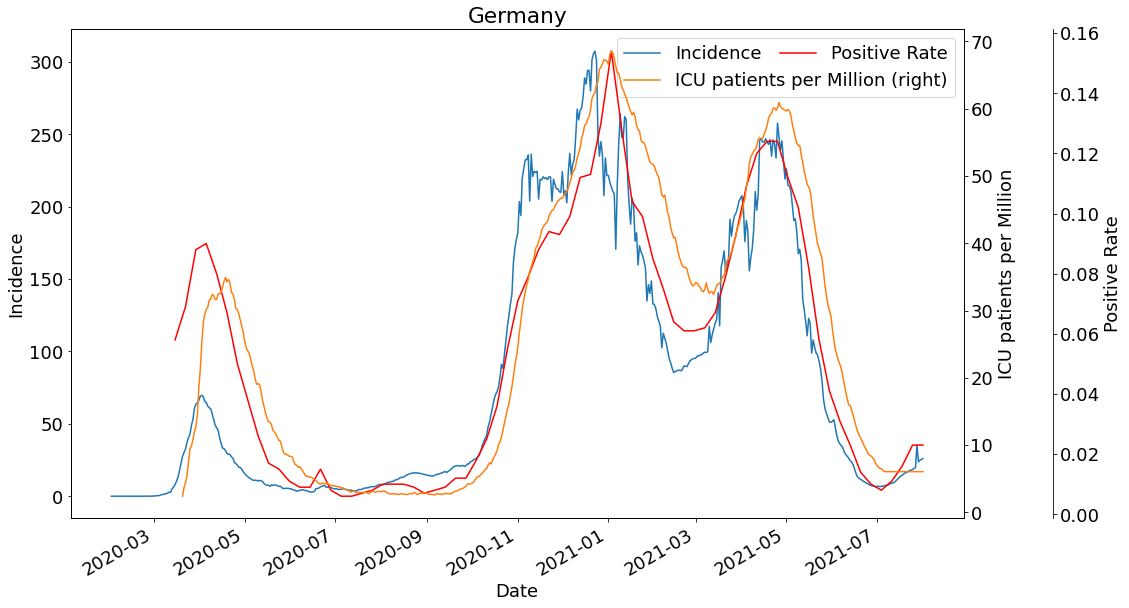

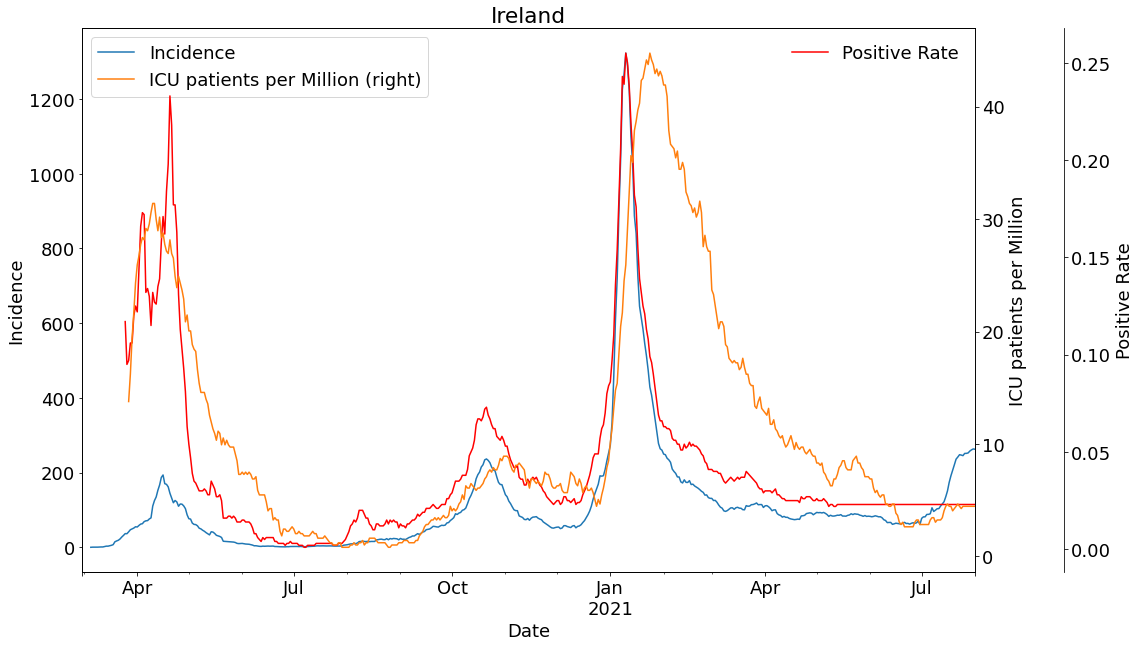

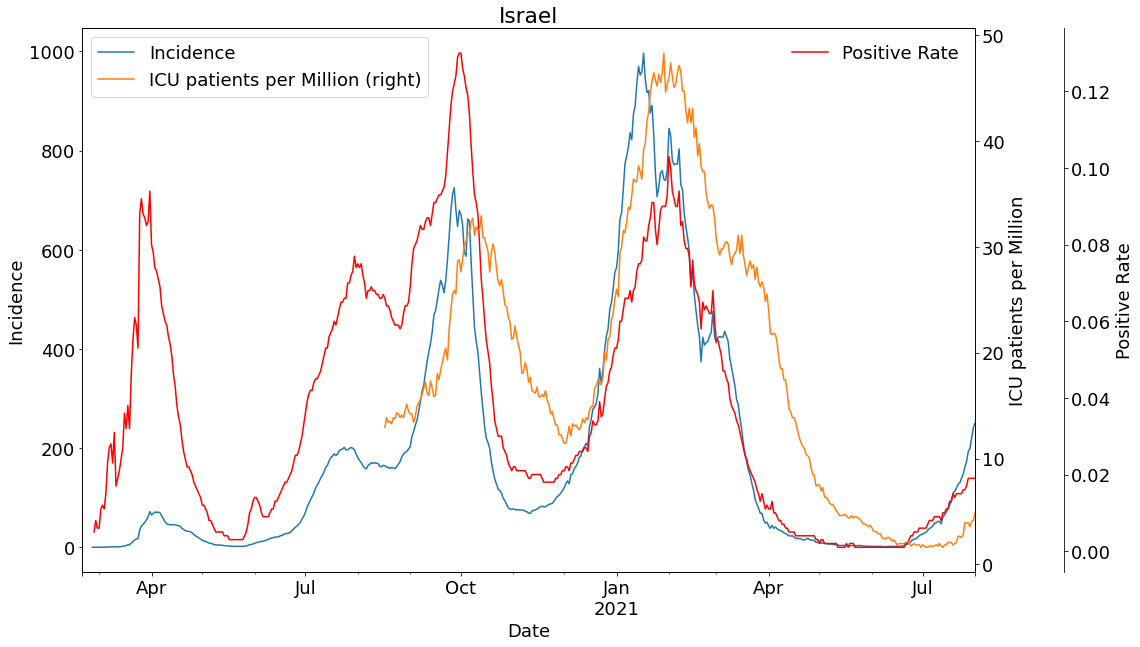

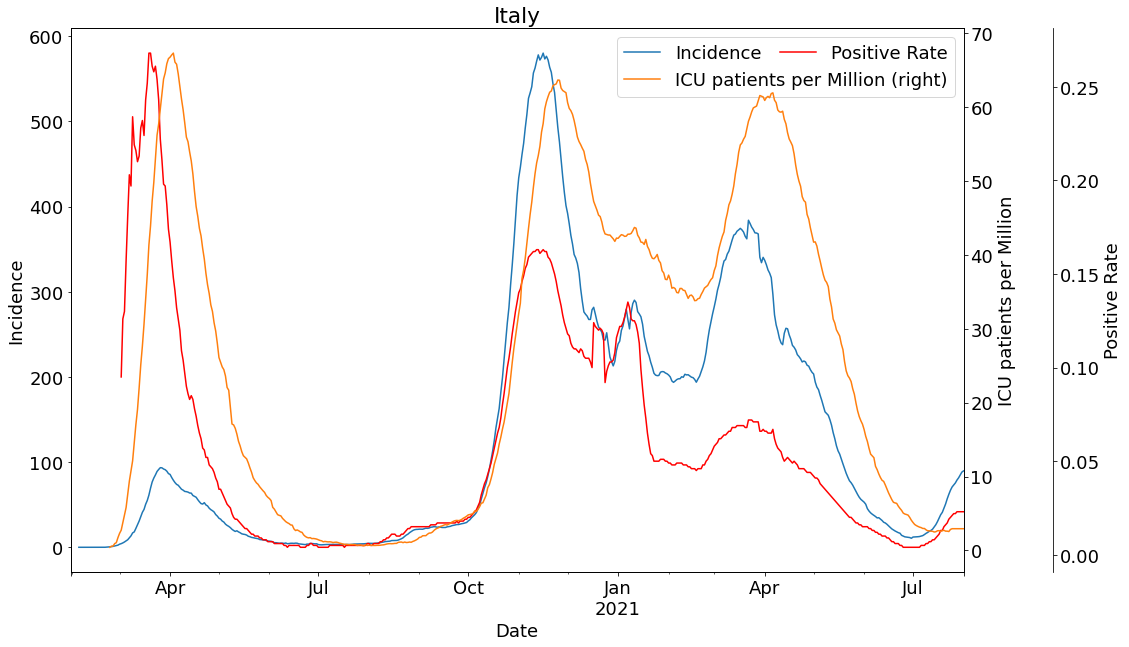

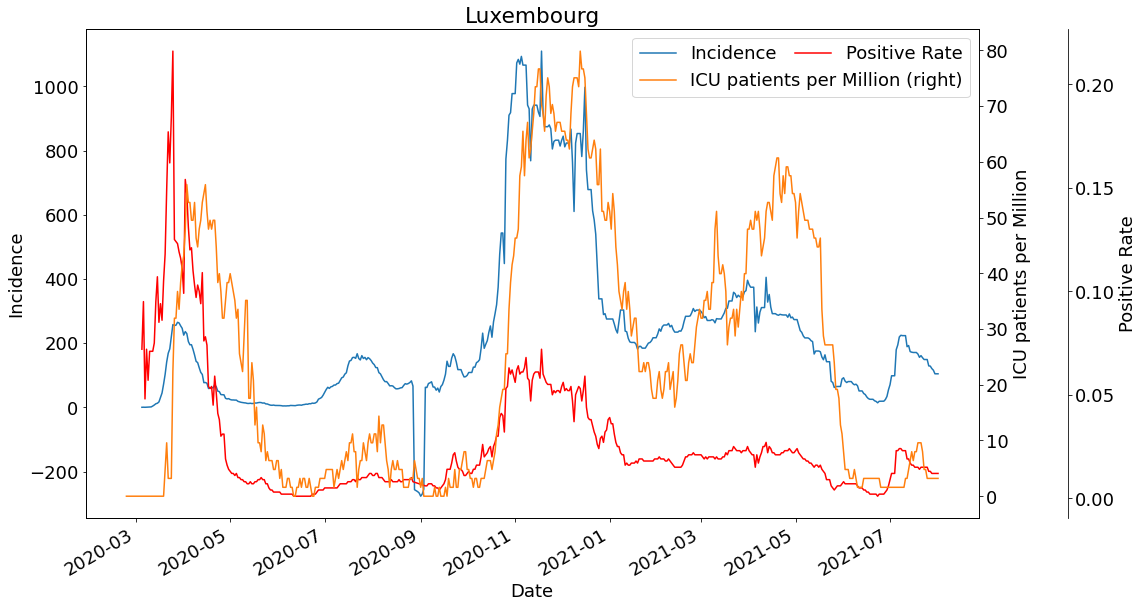

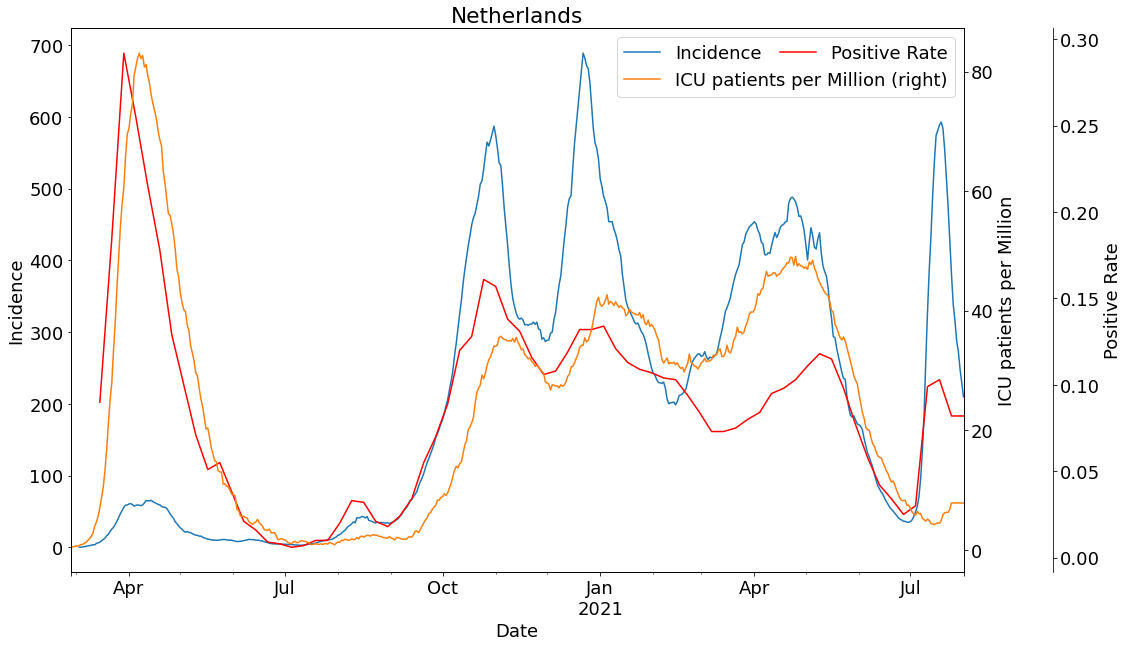

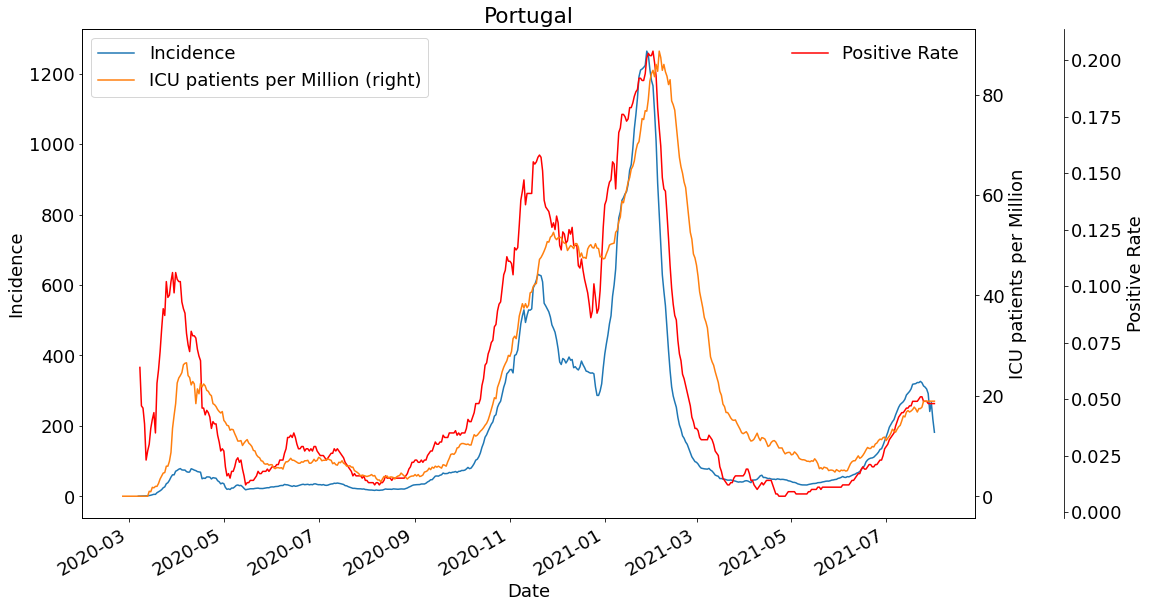

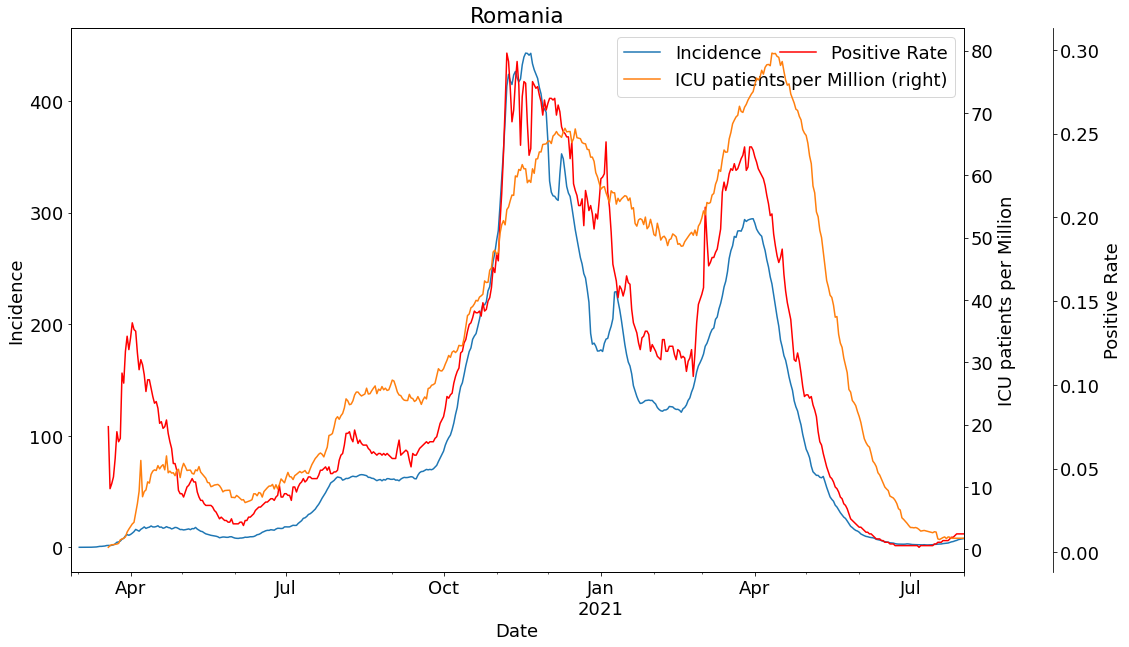

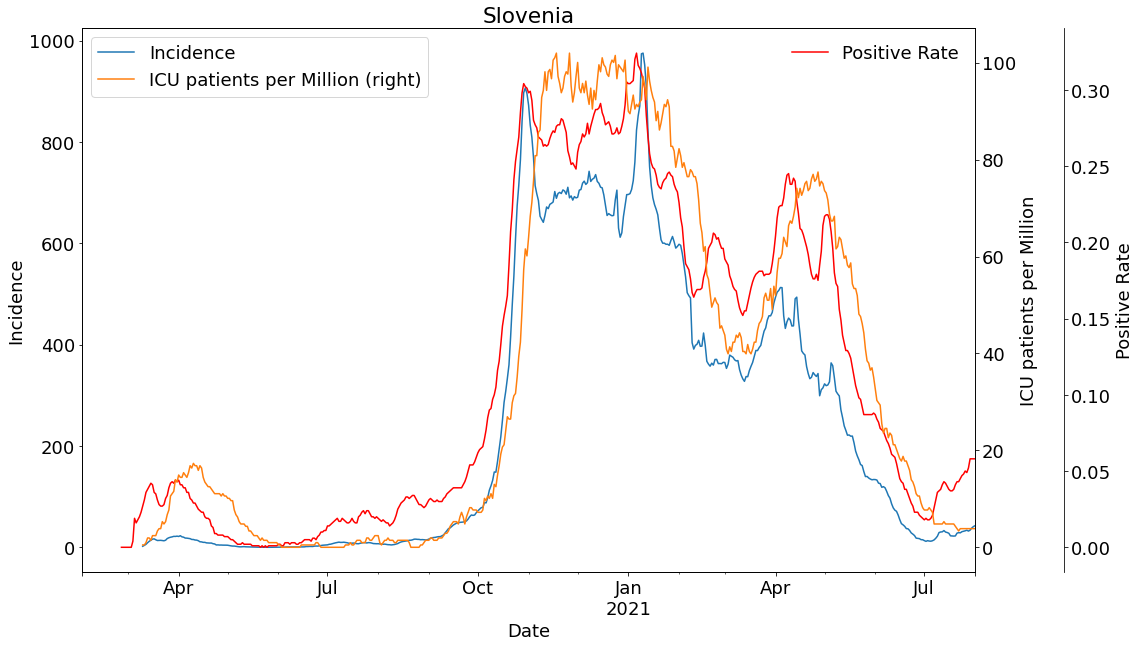

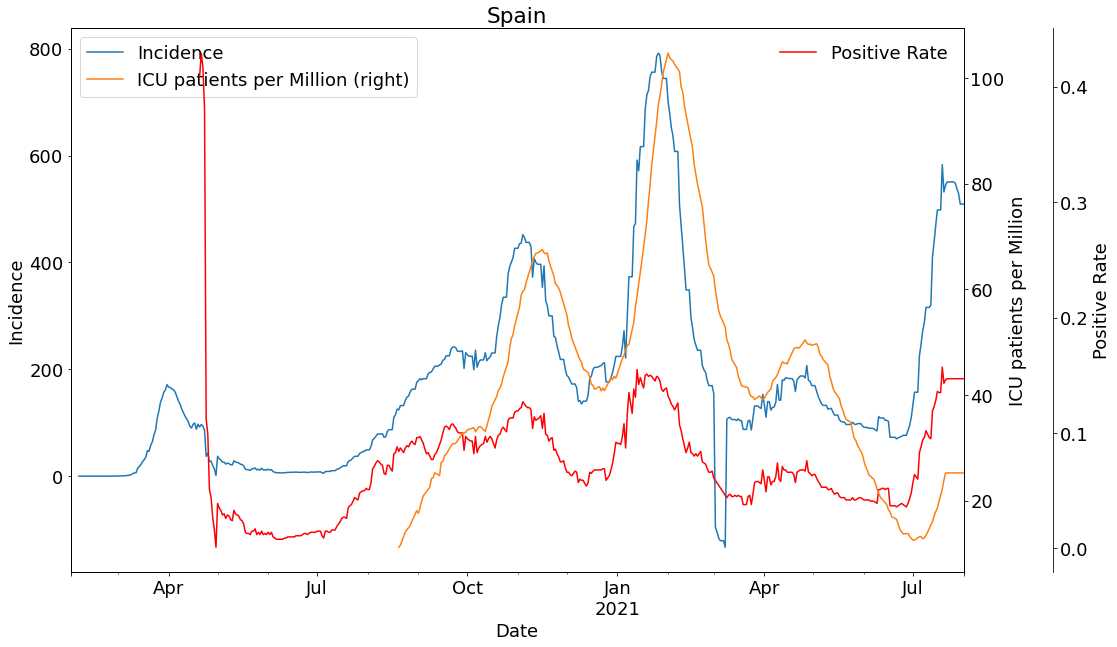

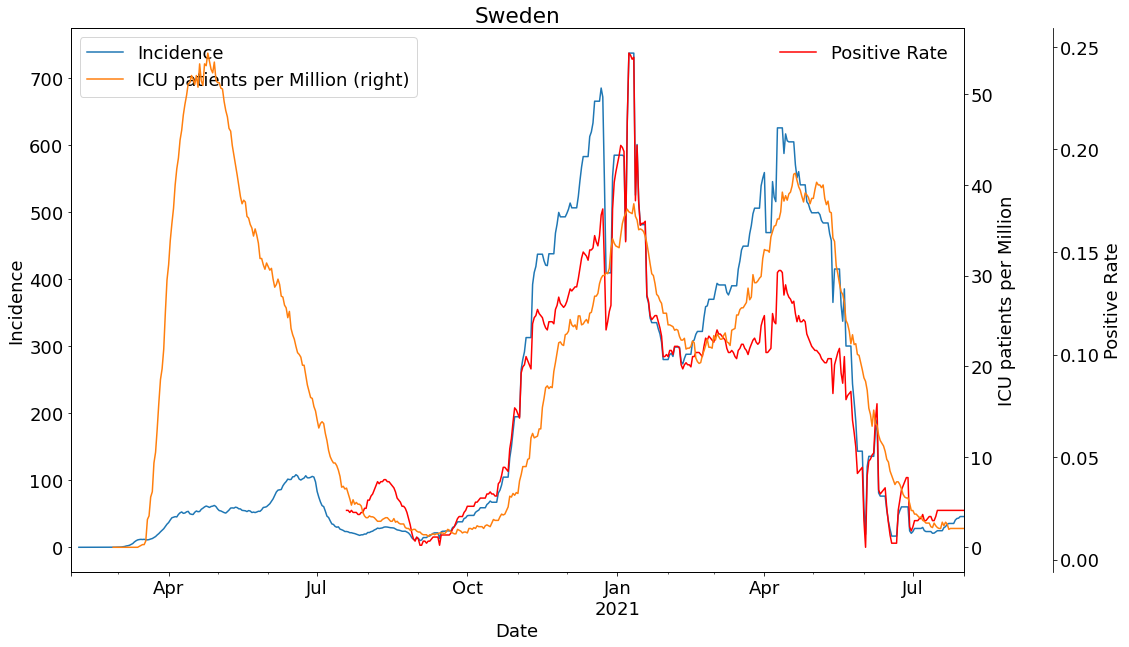

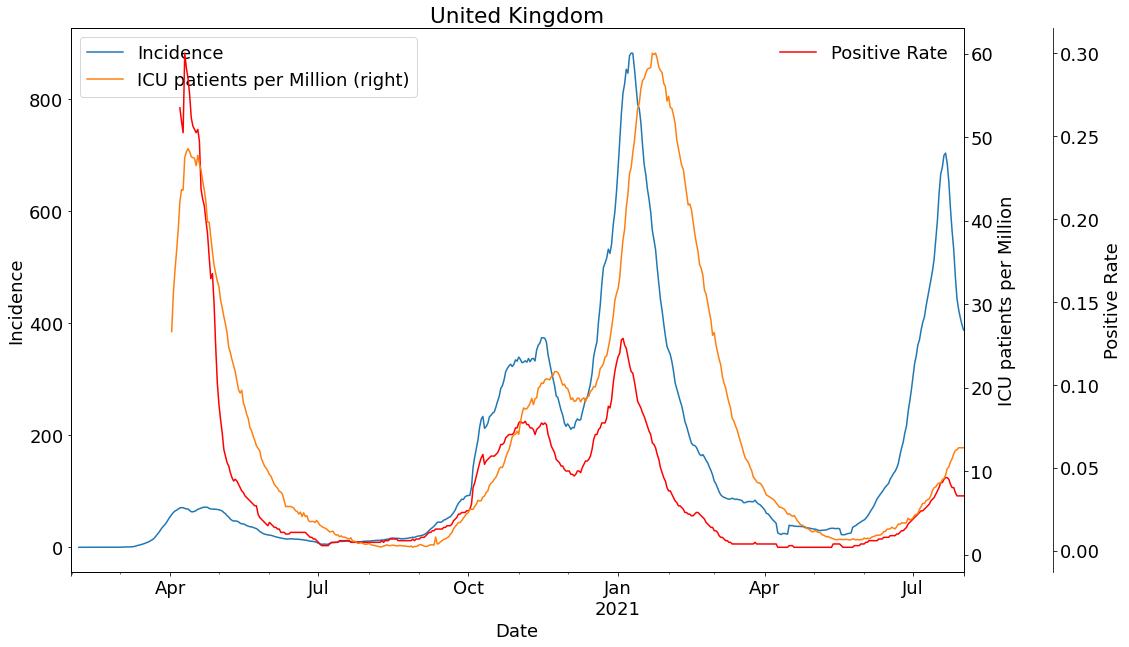

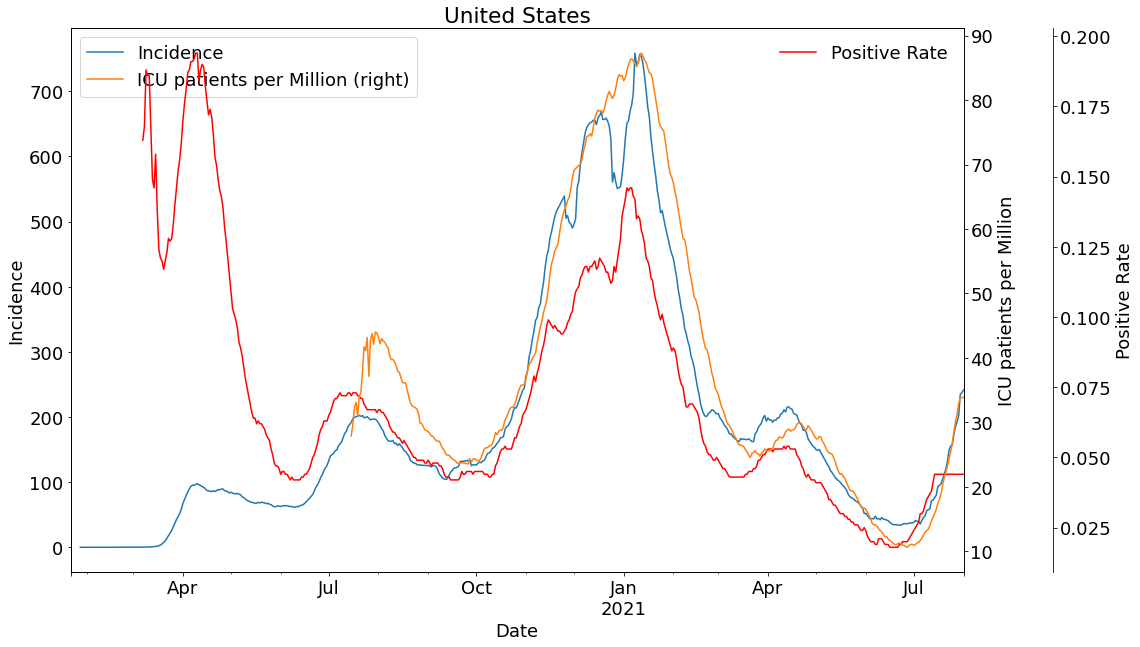

In [9]:
# Plot ICU OCCUPANCY, smoothed case numbers and positive rate

for country in icu_countries:
    df = cases_icu_grouped.get_group(country)
    # interpolate ICU occupancy linearly
    df.interpolate(method='linear', inplace=True)

    fig, ax = plt.subplots(figsize=(16,10))
    # for third variable
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('axes', 1.1))
    
    df.plot(x='date', y='new_cases_smoothed_per_million', kind='line', 
                  ylabel='Incidence', ax=ax, label='Incidence')
    df.plot(x='date', y='icu_patients_per_million', kind='line', ax=ax,
            secondary_y=True, linestyle='solid',
           label='ICU patients per Million')
    df.plot(x='date', y='positive_rate', kind='line', ax=ax2, color='red',
           label='Positive Rate', ylabel='Positive Rate')
    
    ax.set_title(str(df['location'].unique()[0]))
    ax.right_ax.set_ylabel('ICU patients per Million')
    ax.set_xlabel('Date')
    ax2.legend(frameon=False)
    
    fig.savefig('fig4paper/icu_occupancy/icu_occupancy_' + country + '.pdf', bbox_inches='tight')

## Incidence against Positive Rate

In [10]:
# extract country specific positive rates and incidence
full_germany = full_data.loc[full_data.location == 'Germany']
full_israel = full_data.loc[full_data.location == 'Israel']

In [11]:
# define timeframes of the waves
# by visual inspection of plots above
# using Incidence
## Implementation: Add new col to df
colour_dict = {0: 'grey', 1:'blue', 2:'red', 3:'green', 4:'purple'}

## Germany
ger_waves = np.zeros_like(full_germany.location, dtype=int)

first = pd.to_datetime('2020-05-15')
second_begin = pd.to_datetime('2020-09-01')
second_end = pd.to_datetime('2021-02-15')
third_begin = pd.to_datetime('2021-02-16')
third_end = pd.to_datetime('2021-07-01')

ger_first_wave = full_germany['date'] < first
ger_waves[ger_first_wave] = 1

ger_second_wave = (second_begin < full_germany['date']) & (full_germany['date'] < second_end)
ger_waves[ger_second_wave] = 2

ger_third_wave = (third_begin < full_germany['date']) & (full_germany['date'] < third_end)
ger_waves[ger_third_wave] = 3

ger_fourth_wave = full_germany['date'] > third_end
ger_waves[ger_fourth_wave] = 4

full_germany['waves'] = [colour_dict[entry] for entry in ger_waves]

## Israel
isr_waves = np.zeros_like(full_israel.location, dtype=int)

isr_first = pd.to_datetime('2020-05-01')
isr_second_begin = pd.to_datetime('2020-06-25')
isr_second_end = pd.to_datetime('2020-11-07')
isr_third_end = pd.to_datetime('2021-04-01')
isr_fourth_begin = pd.to_datetime('2021-07-08')

isr_first_wave = full_israel['date'] < isr_first
isr_waves[isr_first_wave] = 1

isr_second_wave = (isr_second_begin < full_israel['date']) & (full_israel['date'] < isr_second_end)
isr_waves[isr_second_wave] = 2

isr_third_wave = (isr_second_end < full_israel['date']) & (full_israel['date'] < third_end)
isr_waves[isr_third_wave] = 3

isr_fourth_wave = full_israel['date'] > isr_fourth_begin
isr_waves[isr_fourth_wave] = 4

full_israel['waves'] = [colour_dict[entry] for entry in isr_waves]

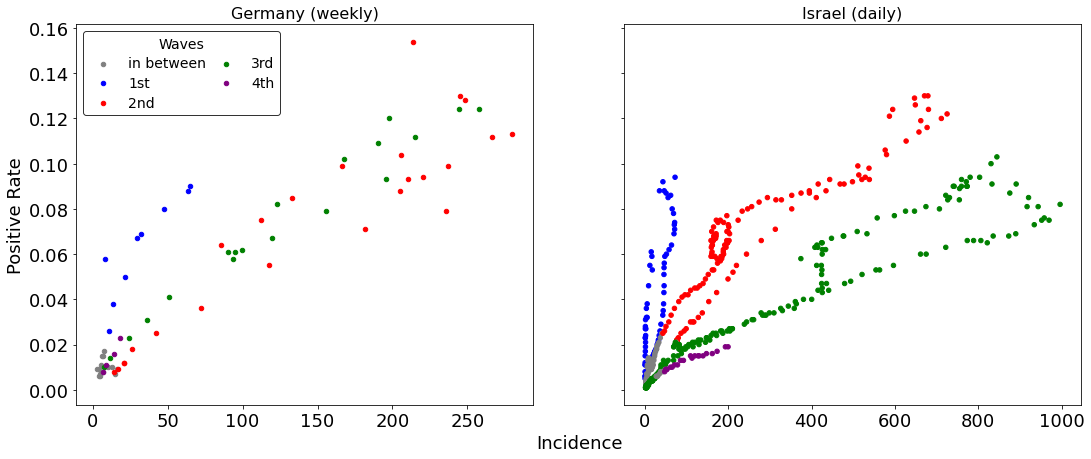

In [12]:
fig, cax = plt.subplots(1, 2, sharey=True, figsize=(18,7))

for wave_id, wave_col in colour_dict.items():
    full_germany[full_germany.waves == wave_col].plot.scatter(x='new_cases_smoothed_per_million',
                                                             y='positive_rate', xlabel=' ', ylabel='Positive Rate',
                                                             ax=cax[0], label=wave_id, c=wave_col)
cax[0].set_title('Germany (weekly)', fontsize=16)

# customize legend
handles, _ = cax[0].get_legend_handles_labels()
cax[0].legend(handles, ['in between', '1st', '2nd', '3rd', '4th'],
             ncol=2, title='Waves', fontsize=14, labelspacing=0.4,
             columnspacing=0.4, title_fontsize=14, edgecolor='black')

full_israel.plot.scatter(x='new_cases_smoothed_per_million', y='positive_rate', xlabel=' ',
                        ylabel='Positive Rate', c='waves', ax=cax[1])
cax[1].set_title('Israel (daily)', fontsize=16)

# add shared x-label
fig.text(0.48, 0.04, 'Incidence')

fig.savefig('fig4paper/posrate_incidence_both.pdf', bbox_inches='tight')

In [93]:
full_germany[full_germany.waves == 'grey']

iso_code continent location       date  total_cases  new_cases  \
36846      DEU    Europe  Germany 2020-05-15     175233.0      755.0   
36847      DEU    Europe  Germany 2020-05-16     175752.0      519.0   
36848      DEU    Europe  Germany 2020-05-17     176369.0      617.0   
36849      DEU    Europe  Germany 2020-05-18     176551.0      182.0   
36850      DEU    Europe  Germany 2020-05-19     177778.0     1227.0   
...        ...       ...      ...        ...          ...        ...   
36954      DEU    Europe  Germany 2020-08-31     244802.0     1497.0   
36955      DEU    Europe  Germany 2020-09-01     246015.0     1213.0   
37122      DEU    Europe  Germany 2021-02-15    2346876.0     5132.0   
37123      DEU    Europe  Germany 2021-02-16    2352766.0     5890.0   
37258      DEU    Europe  Germany 2021-07-01    3736959.0      754.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
36846             663.571        7897.0        13.0               55.286  ...   
36847             632.571        7938.0        41.0               55.571  ...   
36848             641.429        7962.0        24.0               56.143  ...   
36849             567.857        8003.0        41.0               48.857  ...   
36850             658.143        8081.0        78.0               49.000  ...   
...                   ...           ...         ...                  ...  ...   
36954            1240.000        9303.0         3.0                3.857  ...   
36955            1204.571        9307.0         4.0                3.714  ...   
37122            7221.857       65288.0       181.0              442.429  ...   
37123            7245.000       65829.0       541.0              403.286  ...   
37258             577.857       91014.0        69.0               47.000  ...   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
36846                156.139                 8.31            28.2   
36847                156.139                 8.31            28.2   
36848                156.139                 8.31            28.2   
36849                156.139                 8.31            28.2   
36850                156.139                 8.31            28.2   
...                      ...                  ...             ...   
36954                156.139                 8.31            28.2   
36955                156.139                 8.31            28.2   
37122                156.139                 8.31            28.2   
37123                156.139                 8.31            28.2   
37258                156.139                 8.31            28.2   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
36846          33.1                     NaN                         8.0   
36847          33.1                     NaN                         8.0   
36848          33.1                     NaN                         8.0   
36849          33.1                     NaN                         8.0   
36850          33.1                     NaN                         8.0   
...             ...                     ...                         ...   
36954          33.1                     NaN                         8.0   
36955          33.1                     NaN                         8.0   
37122          33.1                     NaN                         8.0   
37123          33.1                     NaN                         8.0   
37258          33.1                     NaN                         8.0   

       life_expectancy  human_development_index  excess_mortality  waves  
36846            81.33                    0.947               NaN   grey  
36847            81.33                    0.947               NaN   grey  
36848            81.33                    0.947              0.94   grey  
36849            81.33                    0.947               NaN   grey  
36850            81.33                    0.947               N

## Playground

In [41]:
[print(date) for date in full_israel.date[full_israel.positive_rate.notna()]]

2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00
2020-03-22 00:00:00
2020-03-23 00:00:00
2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-28 00:00:00
2020-03-29 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [13]:
# extract german positivity rates and incidence
full_germany = full_data.loc[full_data.location == 'Belgium']
posrate_df = full_germany[['new_cases_smoothed_per_million', 'positive_rate', 'date']]

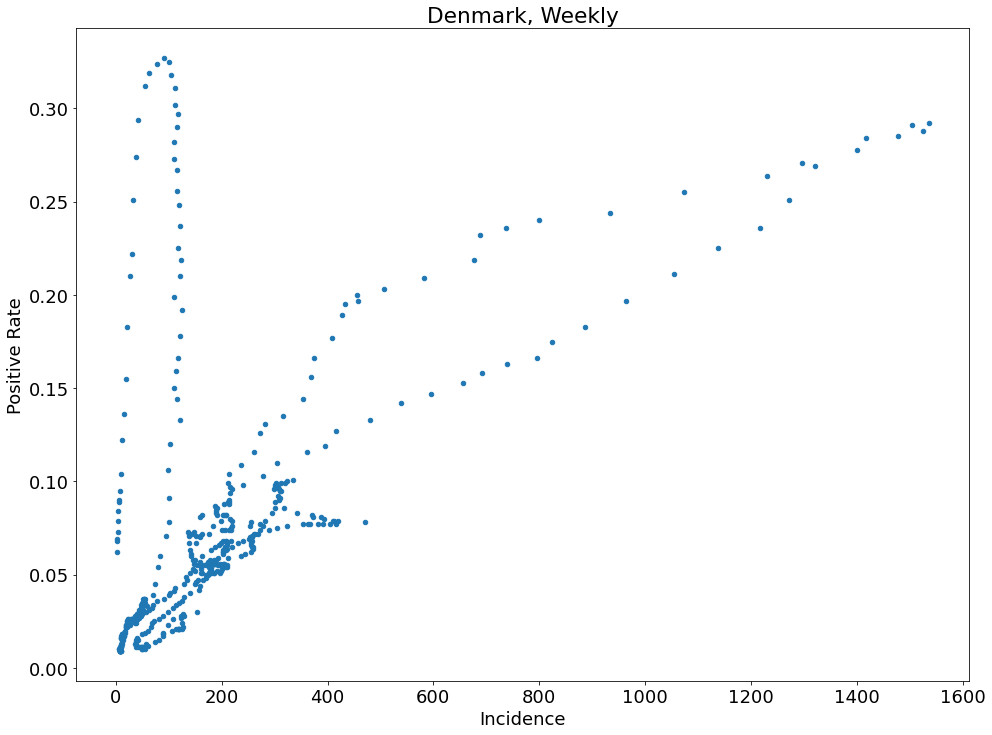

In [14]:
fig = plt.figure(figsize=(16, 12))
cax = plt.gca()

posrate_df.plot.scatter(x='new_cases_smoothed_per_million', y='positive_rate',
                       title='Belgium, Weekly', xlabel='Incidence',
                       ylabel='Positive Rate', ax=cax)
fig.savefig('fig4paper/posrate_incidence_ger.pdf')